In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

path = "drive/MyDrive/data_science/CS418-DataScience-proj-2023-24/data/"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Introduction
In the dynamic landscape of urban environments, understanding and mitigating crime is a critical concern for both policymakers and residents. This project aims to delve into the extensive dataset of crime incidents in Chicago, employing data science techniques to extract insights. In addition, the project will analyze the correlation of crimes with other variables, such as socio economic factors across the different areas of the city.
ML algoritmg are going to be employed to develop models that could potentially be for policy makers.

# Main dataset
The main data set was collected on the Chicago Data Portal (https://data.cityofchicago.org/Public-Safety/Crimes-2022/9hwr-2zxp/data). The portal provides many datasets based on the timeframe of interest.
We focused on the 2020, 2021a and 2022 datasets.

The features of the dataset are:
* **ID**: A unique identifier for each crime record.
* **Case Number**: A unique identifier assigned to each reported crime case.
* **Date**: The date and time when the crime occurred.
* **Block**: The block where the crime incident took place.
* **IUCR** (Illinois Uniform Crime Reporting): An Illinois-specific code that represents the criminal offense classification.
* **Primary Type**: The primary classification of the crime (e.g., theft, assault, burglary).
* **Description**: A detailed description of the specific criminal incident.
* **Location Description**: The type of location where the crime occurred (e.g., street, residence, park).
* **Arrest**: A binary indicator specifying whether an arrest was made in connection with the crime.
* **Domestic**: A binary indicator indicating whether the crime is domestic-related.
* **Beat**: A specific police beat area where the incident occurred.
* **District**: The police district where the crime took place.
* **Ward**: The ward where the crime occurred.
* Community Area: The community area where the crime incident happened.
* **FBI Code**: A code assigned by the FBI to categorize the type of crime.
* **X Coordinate and Y Coordinate**: Geographic coordinates of the location where the crime occurred. Latitude and Longitude-like but on a different scale.
* **Year**: The year in which the crime was reported.
* Updated On: The date and time when the crime record was last updated.
* **Latitude** and **Longitude**: Additional geographic coordinates, specifying the location of the crime incident.
* **Location**: A combined field indicating the latitude and longitude coordinates.



In [ ]:
data_2020 = pd.read_csv(path + '2020.csv')

In [ ]:
data_2021 = pd.read_csv(path + '2021.csv')

In [ ]:
data_2022 = pd.read_csv(path + '2022.csv')

In [ ]:
data_all = pd.read_csv(path + "2001-2023.csv")

In [ ]:
datasets = [data_2020, data_2021, data_2022, data_all]

the columns ID, Case Number, X Coordinate, Y Coordinate, Location are dropped because not interenting statistics-wise or redundant

In [ ]:
remove = ['ID', 'Case Number', 'X Coordinate', 'Y Coordinate', 'Location']
for d in datasets:
  # remove redundant columns
  d.drop(columns=remove, inplace=True)

  # drop null values
  d.dropna()

# Crime Trends and Temporal Pattern Analysis - Sanjana

This section delves into the exploration of Chicago crime data from 2020 to 2022, examining various crime types, their temporal patterns, and the impact of external factors like the COVID-19 pandemic. Although there are many crime types listed in the dataset but we chose the frequently happening crimes that are highly mentioned by the Chicago police in their yearly crime reports. Two key hypotheses were formulated and tested, yielding unexpected findings.

## Daylight Hours and Property Crimes
Our initial hypothesis suggested that reduced daylight hours during winter might contribute to a seasonal rise in property crimes, particularly burglaries and thefts. However, upon visualizing the crime data, we discovered a counterintuitive trend. Contrary to expectations, most theft crimes occurred during the summer and in daylight hours. This unexpected finding challenges conventional assumptions about the relationship between daylight and property crimes.

## COVID-19 Impact on Motor Vehicle Crime and Robbery
In light of the COVID-19 pandemic in 2020, our hypothesis posited that motor vehicle crime and robbery rates would be higher during this period. The data analysis supported this hypothesis, revealing an elevated incidence of motor vehicle crimes in 2020 compared to subsequent years. Similarly, the robbery crime rate was higher in 2020 during the pandemic, highlighting the potential influence of external factors on certain types of criminal activity.

Beyond the annual and seasonal trends, our analysis delved into the temporal patterns of specific crimes. The data analysis revealed a notable increase in burglary rates from 2020 to 2022. The reasons behind this escalating trend should be explored further to develop effective crime prevention strategies. Theft crimes exhibited a peak from noon to midnight, challenging the assumption of increased opportunities during reduced daylight hours. Motor vehicle thefts, as predicted, peaked after 6 pm to midnight. Homicides were more prevalent from 3 pm to early morning, emphasizing the importance of targeted law enforcement efforts during these hours.
Sexual harassment incidents were alarming as they occurred throughout the day, highlighting the need for comprehensive prevention strategies. Robberies tended to happen as darkness fell, aligning with common perceptions of opportunistic crimes under the cover of night.

Battery crimes displayed temporal variations, with a notable shift during the COVID-19 pandemic. In 2020, battery crimes were concentrated in the late hours, while in 2021 and 2022, they occurred throughout the day. The sparse data on kidnapping and human trafficking hindered the detection of temporal patterns for these crimes. Weapon violations exhibited a tendency to occur as darkness descended, indicating a potential association between low light conditions and these crimes.

In conclusion, this comprehensive analysis sheds light on the nuanced dynamics of crime in Chicago, challenging assumptions and revealing complex temporal patterns. The findings have implications for law enforcement strategies, resource allocation, and the development of targeted interventions to address specific crime types.


**Here we are showing the visualization for the year 2020, but we also did the same for the year 2021 and 2022 for the crime temporal analysis.**



<ipython-input-22-53317a5f45cc>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theft_data['Date'] = pd.to_datetime(theft_data['Date'], format='%m/%d/%Y %I:%M:%S %p')
<ipython-input-22-53317a5f45cc>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theft_data['Month'] = theft_data['Date'].dt.strftime('%b')
<ipython-input-22-53317a5f45cc>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

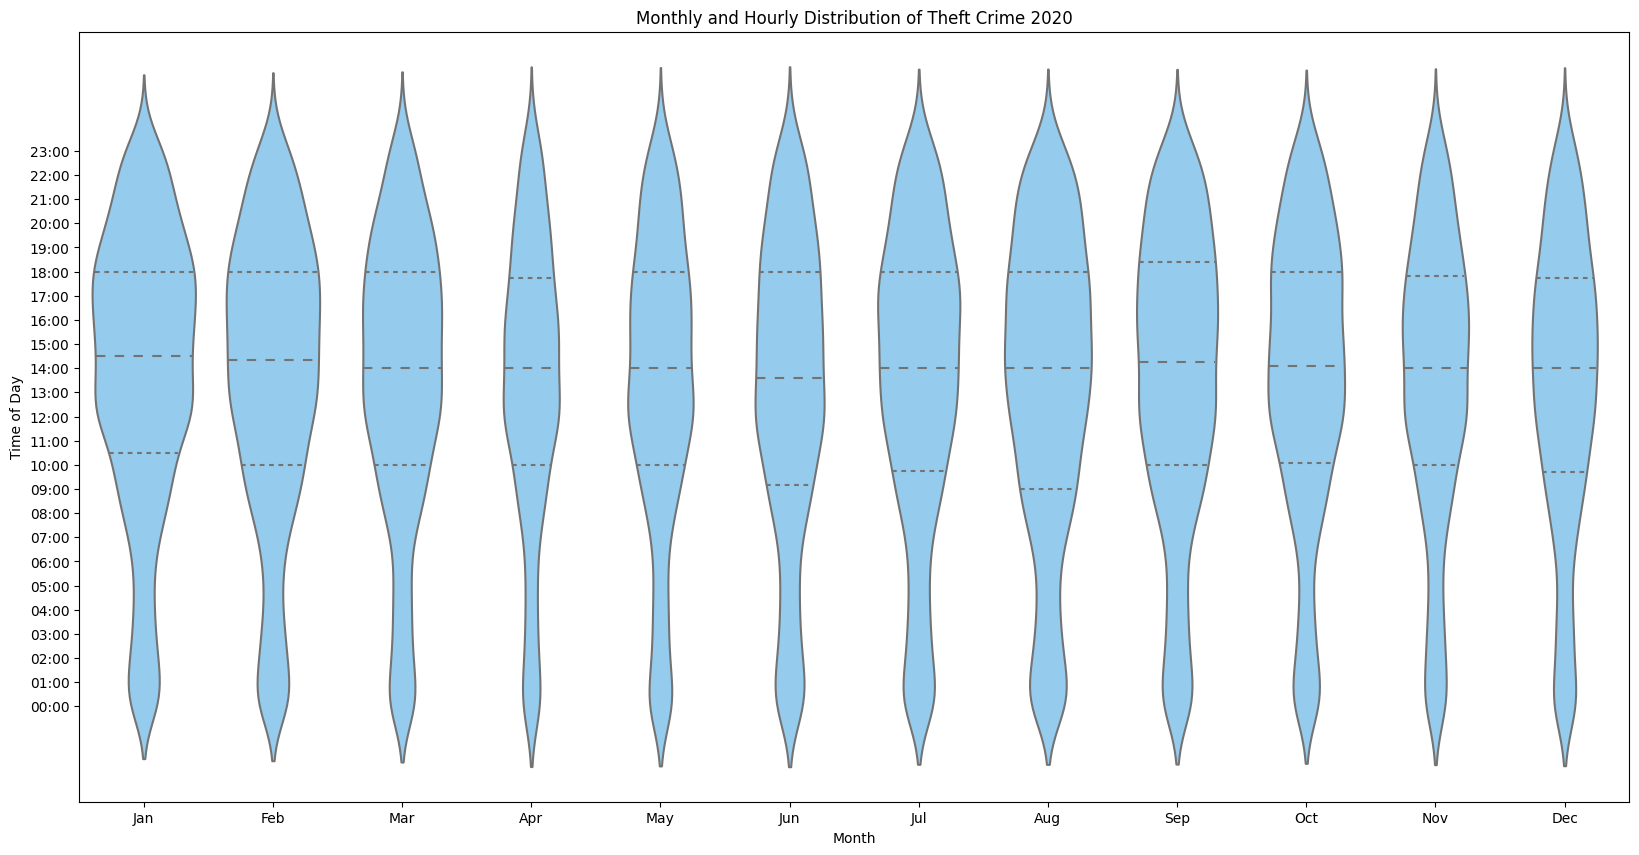

In [ ]:
data = data_2020
# Filter data for the 'Theft' crime type
theft_data = data[data['Primary Type'] == 'THEFT']
theft_data

# Convert the 'Date' column to a datetime object
theft_data['Date'] = pd.to_datetime(theft_data['Date'], format='%m/%d/%Y %I:%M:%S %p')

# Extract the month and time as minutes since midnight
theft_data['Month'] = theft_data['Date'].dt.strftime('%b')
theft_data['Time'] = theft_data['Date'].dt.hour * 60 + theft_data['Date'].dt.minute



# Map months to seasons
season_mapping = {
    'Jan': 'Winter', 'Feb': 'Winter', 'Mar': 'Winter',
    'Apr': 'Winter', 'May': 'Summer', 'Jun': 'Summer',
    'Jul': 'Summer', 'Aug': 'Summer', 'Sep': 'Summer',
    'Oct': 'Summer', 'Nov': 'Winter', 'Dec': 'Winter'
}
theft_data['Season'] = theft_data['Month'].map(season_mapping)

# Define the order of months for proper alignment
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# color = ["lightblue", "lightpink"]
# palette = sns.set_palette(sns.color_palette(color))
colors = {
    'Winter': 'lightblue',
    'Summer': 'lightpink',
}


# Create the violin plot
plt.figure(figsize=(20, 10))
ax = sns.violinplot(data=theft_data, x='Month', y='Time', color="lightskyblue",
                    inner='quart', scale='count')
plt.title('Monthly and Hourly Distribution of Theft Crime 2020')
plt.xlabel('Month')
plt.ylabel('Time of Day')
plt.yticks(range(0, 1440, 60), [f"{h:02d}:{m:02d}" for h in range(24) for m in range(0, 60, 60)])


# Move the legend to the right
# plt.legend(title="Season", loc='upper left', bbox_to_anchor=(1.0, 1.0))

plt.show()

Theft

<ipython-input-23-faa9323b628f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theft_data['Date'] = pd.to_datetime(theft_data['Date'], format='%m/%d/%Y %I:%M:%S %p')
<ipython-input-23-faa9323b628f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theft_data['Month'] = theft_data['Date'].dt.strftime('%b')
<ipython-input-23-faa9323b628f>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

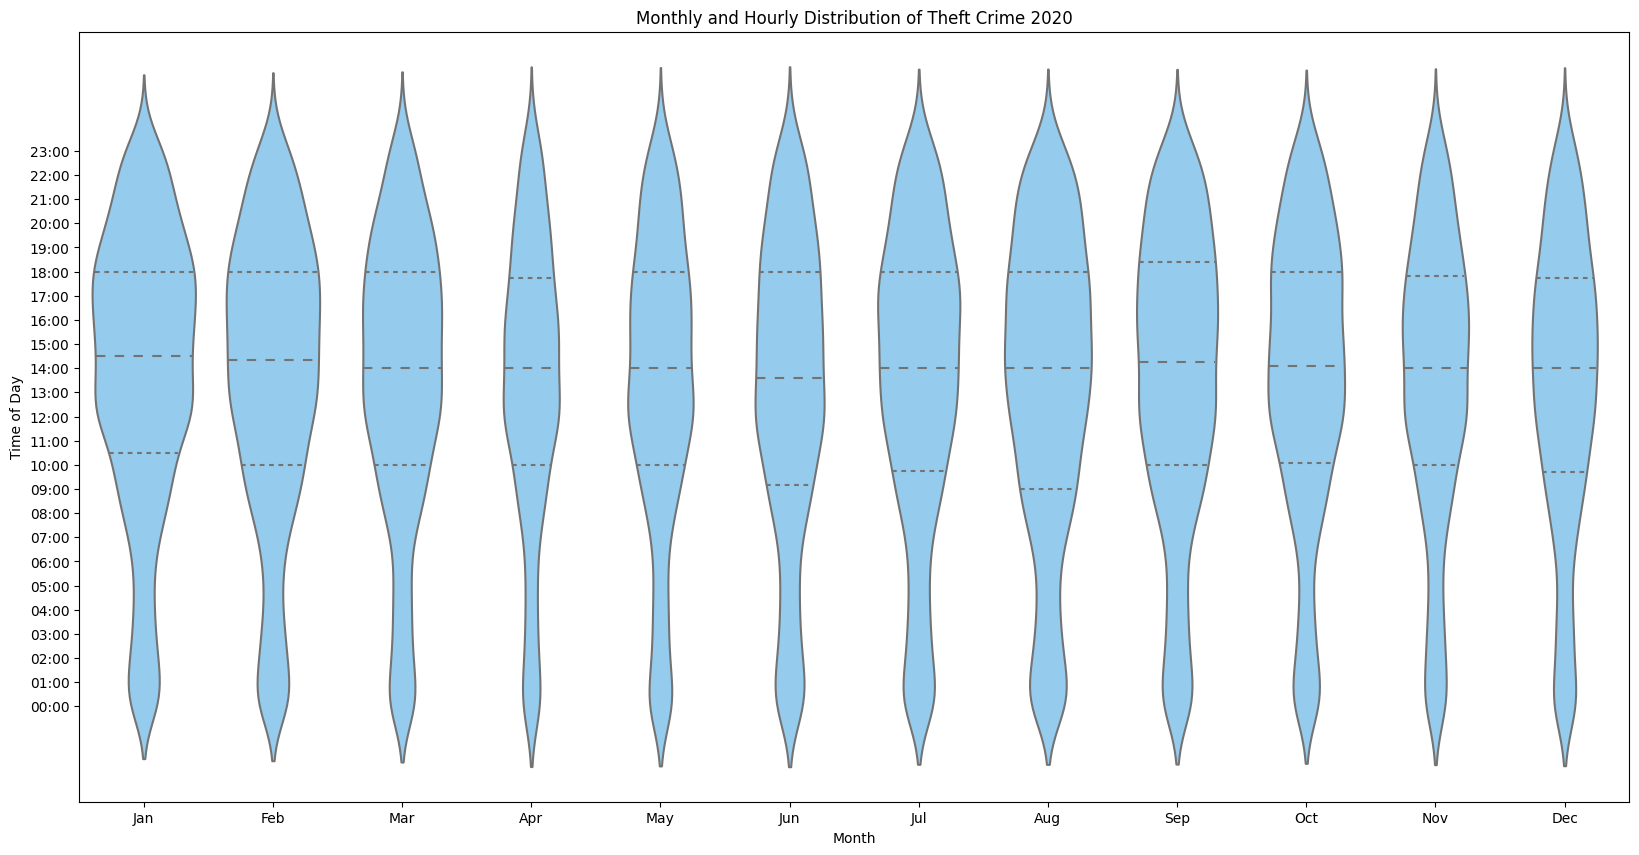

In [ ]:
# Filter data for the 'Theft' crime type
theft_data = data[data['Primary Type'] == 'THEFT']
theft_data

# Convert the 'Date' column to a datetime object
theft_data['Date'] = pd.to_datetime(theft_data['Date'], format='%m/%d/%Y %I:%M:%S %p')

# Extract the month and time as minutes since midnight
theft_data['Month'] = theft_data['Date'].dt.strftime('%b')
theft_data['Time'] = theft_data['Date'].dt.hour * 60 + theft_data['Date'].dt.minute



# Map months to seasons
season_mapping = {
    'Jan': 'Winter', 'Feb': 'Winter', 'Mar': 'Winter',
    'Apr': 'Winter', 'May': 'Summer', 'Jun': 'Summer',
    'Jul': 'Summer', 'Aug': 'Summer', 'Sep': 'Summer',
    'Oct': 'Summer', 'Nov': 'Winter', 'Dec': 'Winter'
}
theft_data['Season'] = theft_data['Month'].map(season_mapping)

# Define the order of months for proper alignment
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# color = ["lightblue", "lightpink"]
# palette = sns.set_palette(sns.color_palette(color))
colors = {
    'Winter': 'lightblue',
    'Summer': 'lightpink',
}


# Create the violin plot
plt.figure(figsize=(20, 10))
ax = sns.violinplot(data=theft_data, x='Month', y='Time', color="lightskyblue",
                    inner='quart', scale='count')
plt.title('Monthly and Hourly Distribution of Theft Crime 2020')
plt.xlabel('Month')
plt.ylabel('Time of Day')
plt.yticks(range(0, 1440, 60), [f"{h:02d}:{m:02d}" for h in range(24) for m in range(0, 60, 60)])


# Move the legend to the right
# plt.legend(title="Season", loc='upper left', bbox_to_anchor=(1.0, 1.0))

plt.show()


MOTOR VEHICLE THEFT

<ipython-input-24-df646e142f42>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theft_data['Date'] = pd.to_datetime(theft_data['Date'], format='%m/%d/%Y %I:%M:%S %p')
<ipython-input-24-df646e142f42>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theft_data['Month'] = theft_data['Date'].dt.strftime('%b')
<ipython-input-24-df646e142f42>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

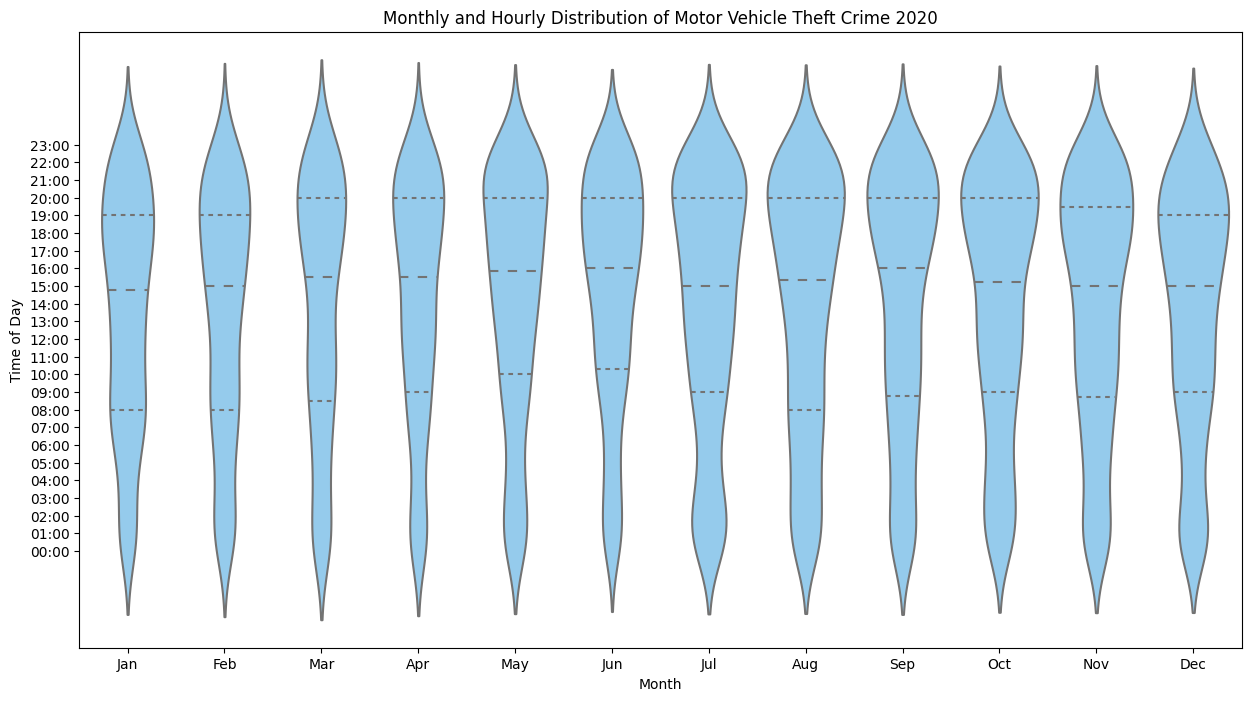

In [ ]:
theft_data = data[data['Primary Type'] == 'MOTOR VEHICLE THEFT']

# Convert the 'Date' column to a datetime object
theft_data['Date'] = pd.to_datetime(theft_data['Date'], format='%m/%d/%Y %I:%M:%S %p')

# Extract the month and time as minutes since midnight
theft_data['Month'] = theft_data['Date'].dt.strftime('%b')
theft_data['Time'] = theft_data['Date'].dt.hour * 60 + theft_data['Date'].dt.minute

# Create the violin plot
plt.figure(figsize=(15, 8))
sns.violinplot(data=theft_data, x='Month', y='Time', color="lightskyblue", inner='quart', scale='count')
plt.title('Monthly and Hourly Distribution of Motor Vehicle Theft Crime 2020')
plt.xlabel('Month')
plt.ylabel('Time of Day')
plt.yticks(range(0, 1440, 60), [f"{h:02d}:{m:02d}" for h in range(24) for m in range(0, 60, 60)])
plt.show()

HOMICIDE

<ipython-input-25-dbeec7d72ff1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HOMICIDE_data['Date'] = pd.to_datetime(HOMICIDE_data['Date'], format='%m/%d/%Y %I:%M:%S %p')
<ipython-input-25-dbeec7d72ff1>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HOMICIDE_data['Month'] = HOMICIDE_data['Date'].dt.strftime('%b')
<ipython-input-25-dbeec7d72ff1>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

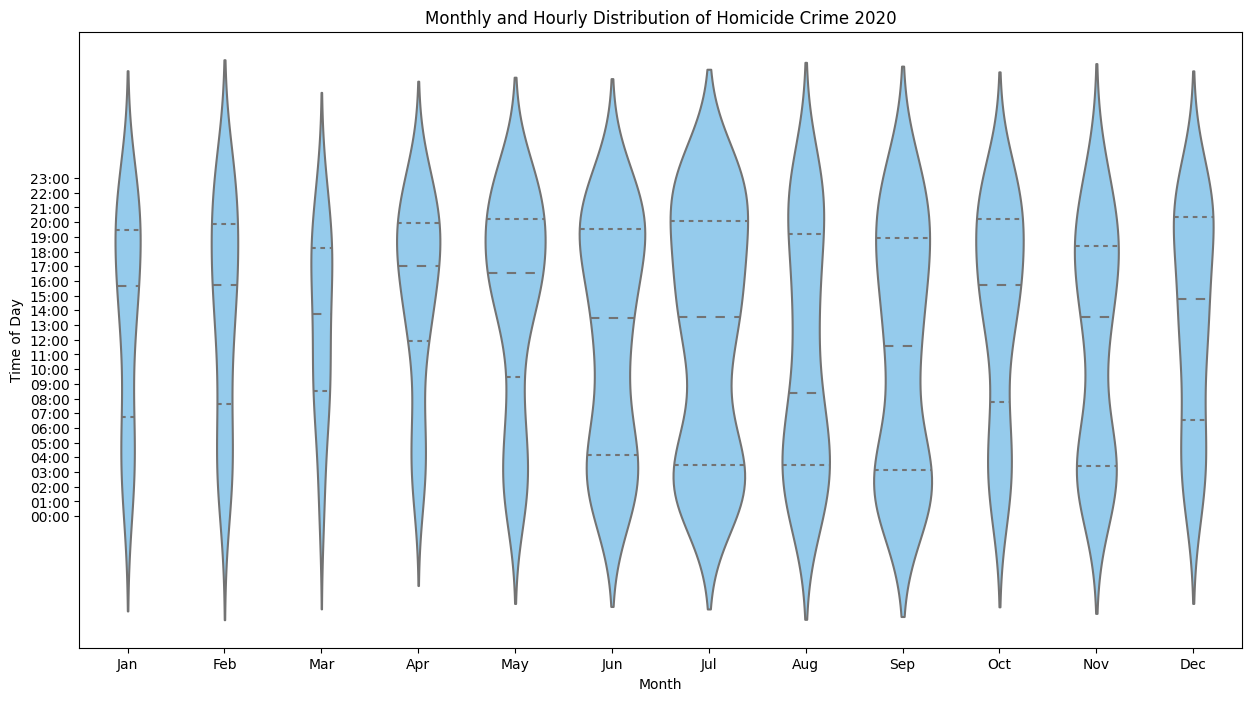

In [ ]:
# Filter data for the 'HOMICIDE' crime type
HOMICIDE_data = data[data['Primary Type'] == 'HOMICIDE']


# Convert the 'Date' column to a datetime object
HOMICIDE_data['Date'] = pd.to_datetime(HOMICIDE_data['Date'], format='%m/%d/%Y %I:%M:%S %p')

# Extract the month and time as minutes since midnight
HOMICIDE_data['Month'] = HOMICIDE_data['Date'].dt.strftime('%b')
HOMICIDE_data['Time'] = HOMICIDE_data['Date'].dt.hour * 60 + HOMICIDE_data['Date'].dt.minute

# Create the violin plot
plt.figure(figsize=(15, 8))
sns.violinplot(data=HOMICIDE_data, x='Month', y='Time', color="lightskyblue", inner='quart', scale='count')
plt.title('Monthly and Hourly Distribution of Homicide Crime 2020')
plt.xlabel('Month')
plt.ylabel('Time of Day')
plt.yticks(range(0, 1440, 60), [f"{h:02d}:{m:02d}" for h in range(24) for m in range(0, 60, 60)])
plt.show()

CRIMINAL SEXUAL ASSAULT and SEX OFFENSE

<ipython-input-26-dd9afa3ea040>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  criminal_data['Date'] = pd.to_datetime(criminal_data['Date'], format='%m/%d/%Y %I:%M:%S %p')
<ipython-input-26-dd9afa3ea040>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  criminal_data['Month'] = criminal_data['Date'].dt.strftime('%b')
<ipython-input-26-dd9afa3ea040>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

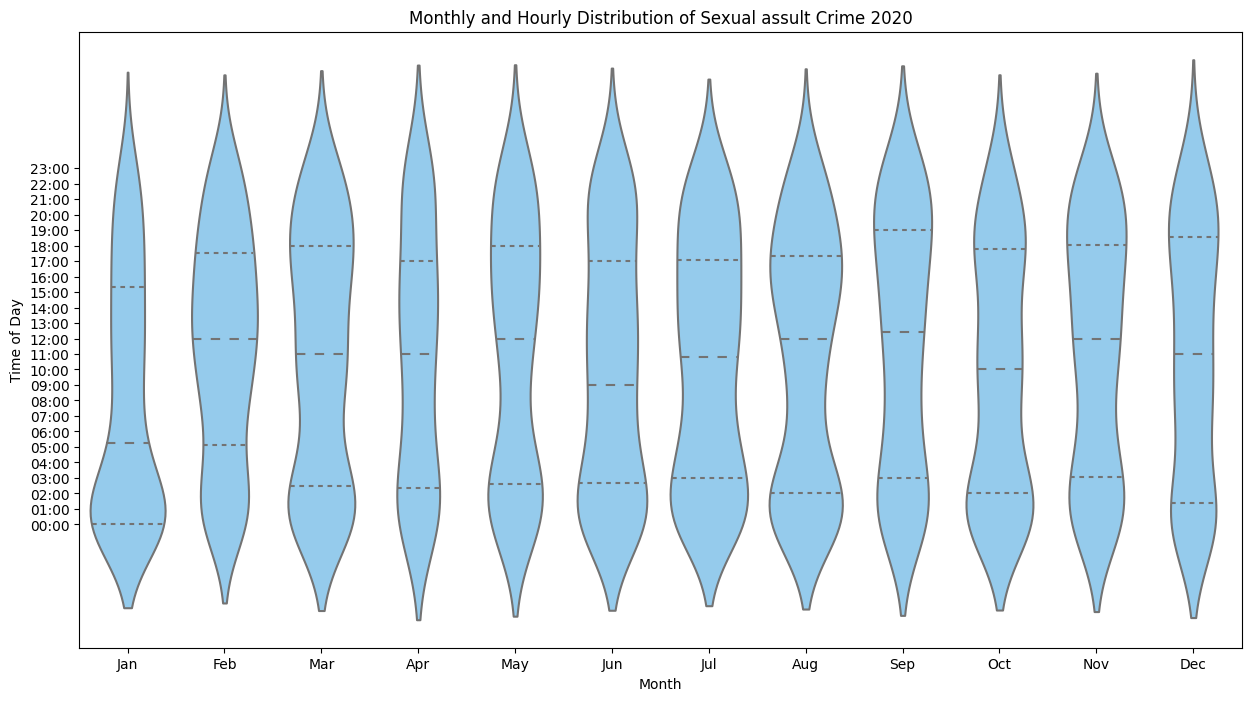

In [ ]:
# Filter data for the 'HOMICIDE' crime type
criminal_data = data[(data['Primary Type'] == 'CRIMINAL SEXUAL ASSAULT') | (data['Primary Type'] == 'SEX OFFENSE')]


# Convert the 'Date' column to a datetime object
criminal_data['Date'] = pd.to_datetime(criminal_data['Date'], format='%m/%d/%Y %I:%M:%S %p')

# Extract the month and time as minutes since midnight
criminal_data['Month'] = criminal_data['Date'].dt.strftime('%b')
criminal_data['Time'] = criminal_data['Date'].dt.hour * 60 + criminal_data['Date'].dt.minute

# Create the violin plot
plt.figure(figsize=(15, 8))
sns.violinplot(data=criminal_data, x='Month', y='Time', color="lightskyblue", inner='quart', scale='count')
plt.title('Monthly and Hourly Distribution of Sexual assult Crime 2020')
plt.xlabel('Month')
plt.ylabel('Time of Day')
plt.yticks(range(0, 1440, 60), [f"{h:02d}:{m:02d}" for h in range(24) for m in range(0, 60, 60)])
plt.show()

ROBBERY

<ipython-input-27-8097cd8cca2b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  criminal_data['Date'] = pd.to_datetime(criminal_data['Date'], format='%m/%d/%Y %I:%M:%S %p')
<ipython-input-27-8097cd8cca2b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  criminal_data['Month'] = criminal_data['Date'].dt.strftime('%b')
<ipython-input-27-8097cd8cca2b>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

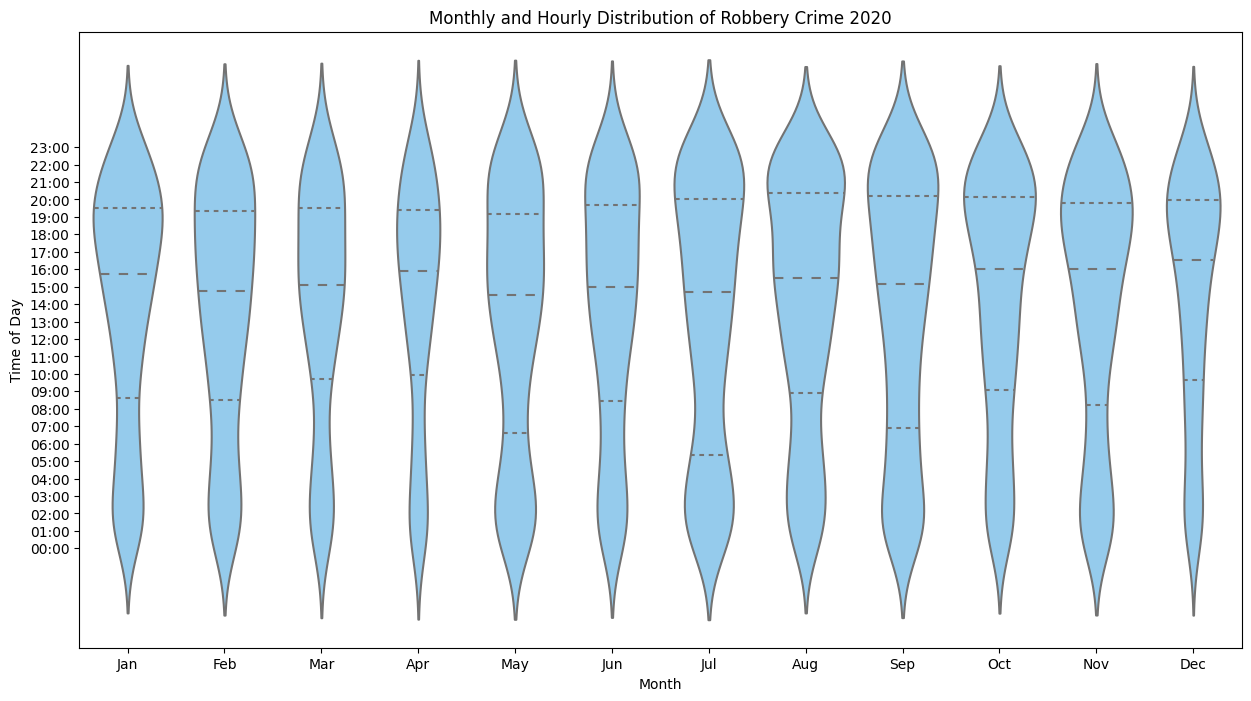

In [ ]:
# Filter data for the 'HOMICIDE' crime type
criminal_data = data[(data['Primary Type'] == 'ROBBERY')]


# Convert the 'Date' column to a datetime object
criminal_data['Date'] = pd.to_datetime(criminal_data['Date'], format='%m/%d/%Y %I:%M:%S %p')

# Extract the month and time as minutes since midnight
criminal_data['Month'] = criminal_data['Date'].dt.strftime('%b')
criminal_data['Time'] = criminal_data['Date'].dt.hour * 60 + criminal_data['Date'].dt.minute

# Create the violin plot
plt.figure(figsize=(15, 8))
sns.violinplot(data=criminal_data, x='Month', y='Time', color="lightskyblue", inner='quart', scale='count')
plt.title('Monthly and Hourly Distribution of Robbery Crime 2020')
plt.xlabel('Month')
plt.ylabel('Time of Day')
plt.yticks(range(0, 1440, 60), [f"{h:02d}:{m:02d}" for h in range(24) for m in range(0, 60, 60)])
plt.show()

BATTERY

<ipython-input-28-904a965fa2e6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  criminal_data['Date'] = pd.to_datetime(criminal_data['Date'], format='%m/%d/%Y %I:%M:%S %p')
<ipython-input-28-904a965fa2e6>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  criminal_data['Month'] = criminal_data['Date'].dt.strftime('%b')
<ipython-input-28-904a965fa2e6>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

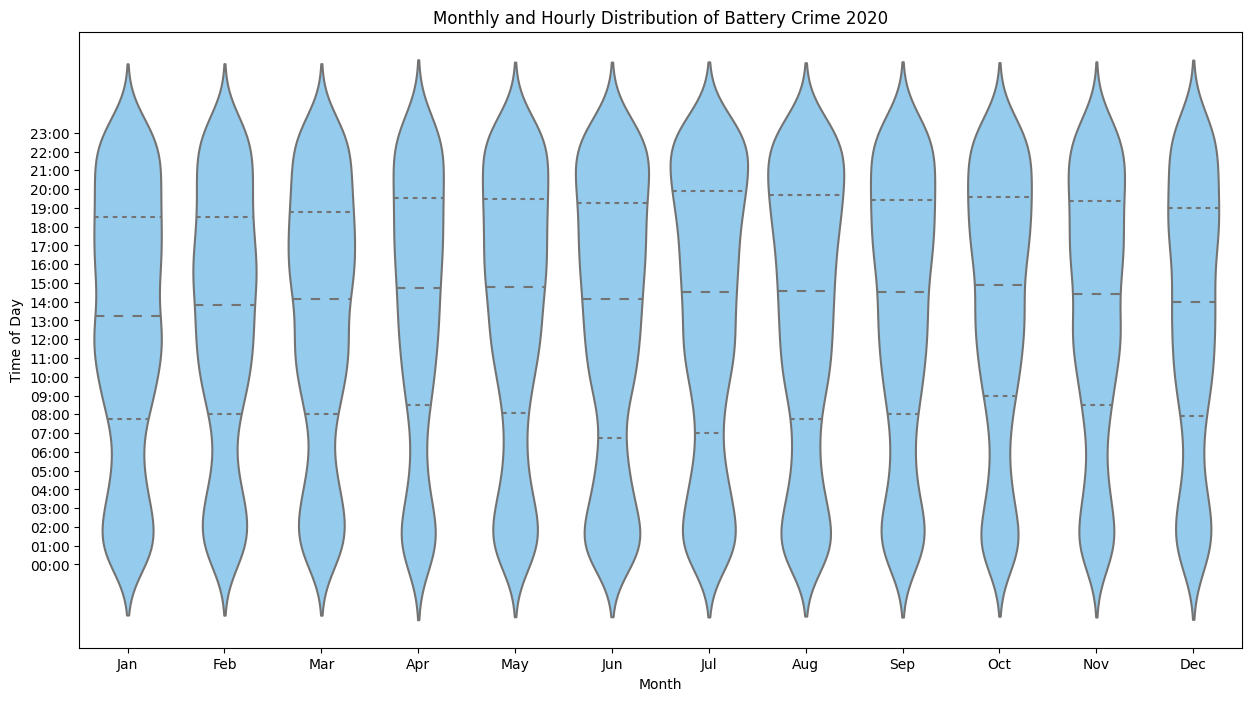

In [ ]:
# Filter data for the 'HOMICIDE' crime type
criminal_data = data[(data['Primary Type'] == 'BATTERY')]

# Convert the 'Date' column to a datetime object
criminal_data['Date'] = pd.to_datetime(criminal_data['Date'], format='%m/%d/%Y %I:%M:%S %p')

# Extract the month and time as minutes since midnight
criminal_data['Month'] = criminal_data['Date'].dt.strftime('%b')
criminal_data['Time'] = criminal_data['Date'].dt.hour * 60 + criminal_data['Date'].dt.minute

# Create the violin plot
plt.figure(figsize=(15, 8))
sns.violinplot(data=criminal_data, x='Month', y='Time', color="lightskyblue", inner='quart', scale='count')
plt.title('Monthly and Hourly Distribution of Battery Crime 2020')
plt.xlabel('Month')
plt.ylabel('Time of Day')
plt.yticks(range(0, 1440, 60), [f"{h:02d}:{m:02d}" for h in range(24) for m in range(0, 60, 60)])
plt.show()

BURGLARY

<ipython-input-29-6a23b4235bb4>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  criminal_data['Date'] = pd.to_datetime(criminal_data['Date'], format='%m/%d/%Y %I:%M:%S %p')
<ipython-input-29-6a23b4235bb4>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  criminal_data['Month'] = criminal_data['Date'].dt.strftime('%b')
<ipython-input-29-6a23b4235bb4>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

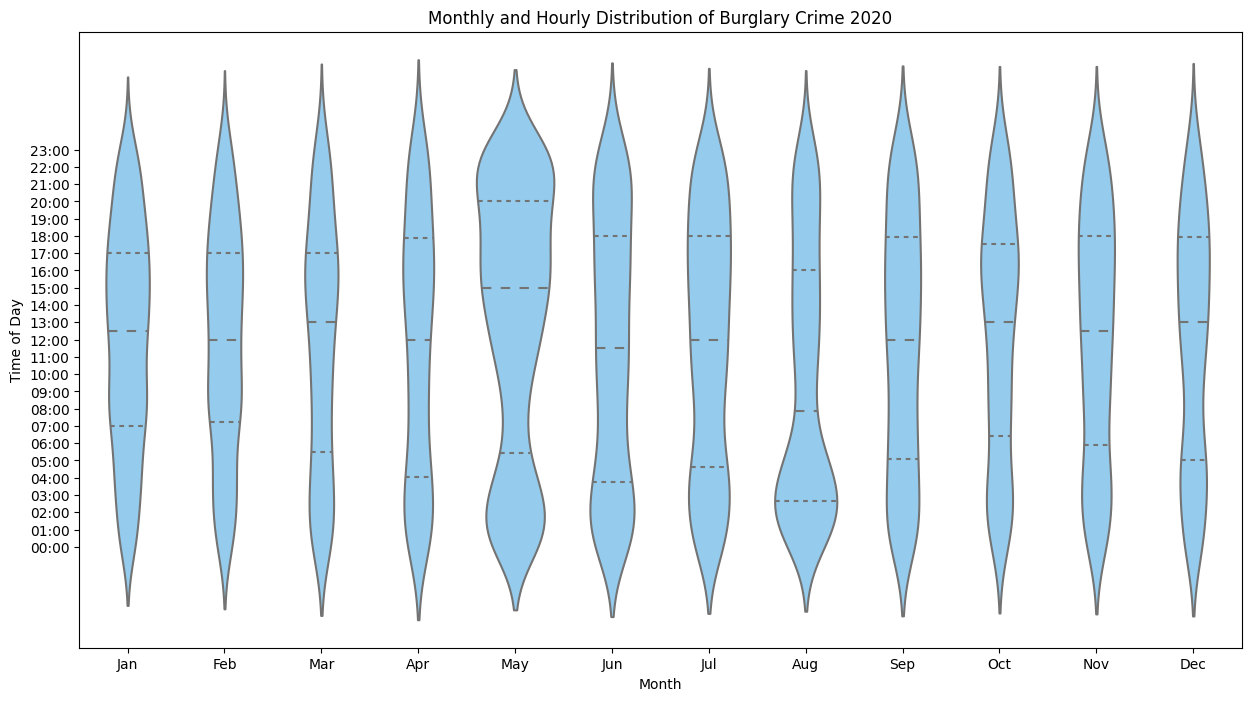

In [ ]:
# Filter data for the 'HOMICIDE' crime type
criminal_data = data[(data['Primary Type'] == 'BURGLARY')]


# Convert the 'Date' column to a datetime object
criminal_data['Date'] = pd.to_datetime(criminal_data['Date'], format='%m/%d/%Y %I:%M:%S %p')

# Extract the month and time as minutes since midnight
criminal_data['Month'] = criminal_data['Date'].dt.strftime('%b')
criminal_data['Time'] = criminal_data['Date'].dt.hour * 60 + criminal_data['Date'].dt.minute

# Create the violin plot
plt.figure(figsize=(15, 8))
sns.violinplot(data=criminal_data, x='Month', y='Time', color="lightskyblue", inner='quart', scale='count')
plt.title('Monthly and Hourly Distribution of Burglary Crime 2020')
plt.xlabel('Month')
plt.ylabel('Time of Day')
plt.yticks(range(0, 1440, 60), [f"{h:02d}:{m:02d}" for h in range(24) for m in range(0, 60, 60)])
plt.show()


# Create the swarmplot
# plt.figure(figsize=(15, 8))
# sns.swarmplot(data=criminal_data, x='Month', y='Time', size=5)
# plt.title('Monthly and Hourly Distribution of Burglary Crime (Swarmplot)')
# plt.xlabel('Month')
# plt.ylabel('Time of Day')
# plt.yticks(range(0, 1440, 60), [f"{h:02d}:{m:02d}" for h in range(24) for m in range(0, 60, 60)])
# plt.show()

KIDNAPPING

<ipython-input-30-f6b260124571>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  criminal_data['Date'] = pd.to_datetime(criminal_data['Date'], format='%m/%d/%Y %I:%M:%S %p')
<ipython-input-30-f6b260124571>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  criminal_data['Month'] = criminal_data['Date'].dt.strftime('%b')
<ipython-input-30-f6b260124571>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

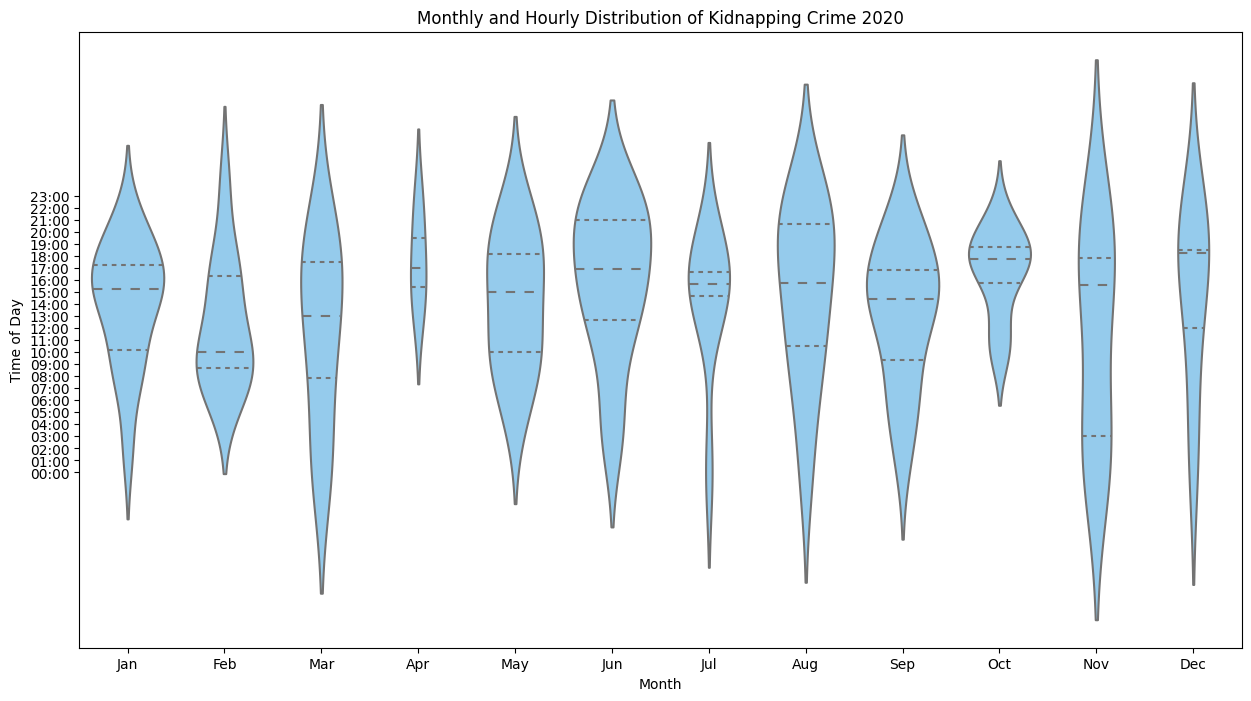

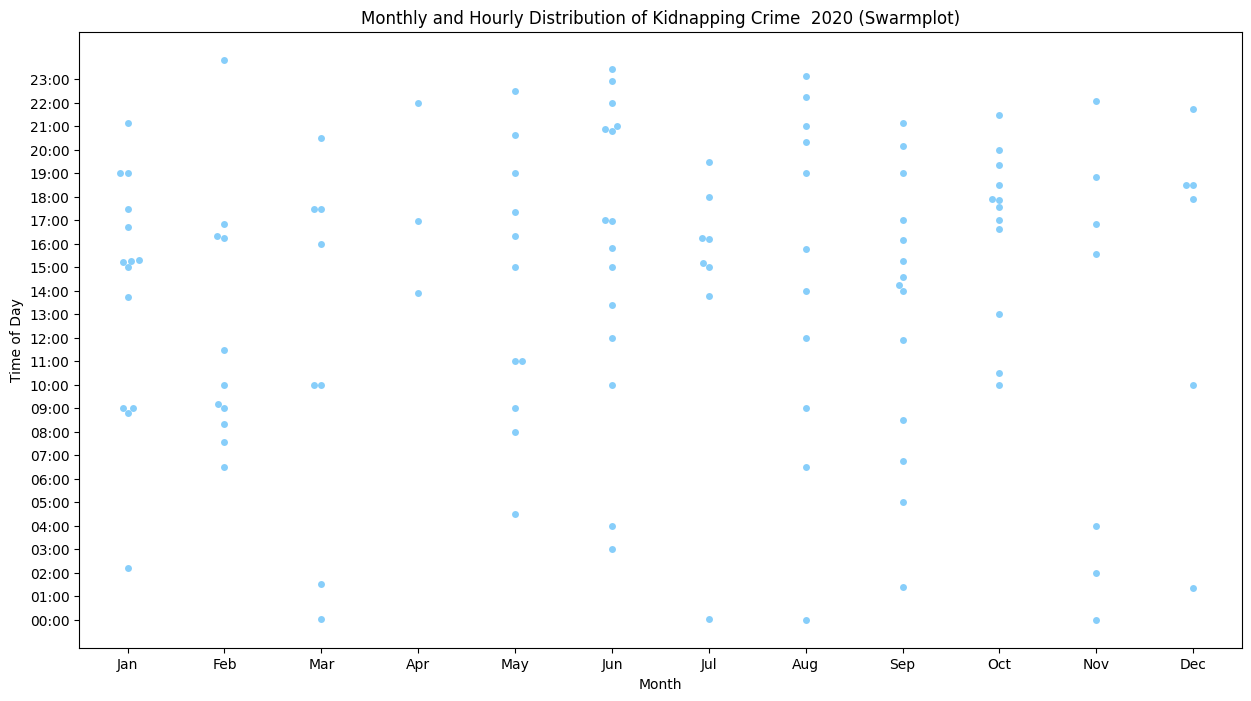

In [ ]:
# Filter data for the 'HOMICIDE' crime type
criminal_data = data[(data['Primary Type'] == 'KIDNAPPING')]


# Convert the 'Date' column to a datetime object
criminal_data['Date'] = pd.to_datetime(criminal_data['Date'], format='%m/%d/%Y %I:%M:%S %p')

# Extract the month and time as minutes since midnight
criminal_data['Month'] = criminal_data['Date'].dt.strftime('%b')
criminal_data['Time'] = criminal_data['Date'].dt.hour * 60 + criminal_data['Date'].dt.minute

# Create the violin plot
plt.figure(figsize=(15, 8))
sns.violinplot(data=criminal_data, x='Month', y='Time', color="lightskyblue", inner='quart', scale='count')
plt.title('Monthly and Hourly Distribution of Kidnapping Crime 2020')
plt.xlabel('Month')
plt.ylabel('Time of Day')
plt.yticks(range(0, 1440, 60), [f"{h:02d}:{m:02d}" for h in range(24) for m in range(0, 60, 60)])
plt.show()

# Create the swarmplot
plt.figure(figsize=(15, 8))
sns.swarmplot(data=criminal_data, x='Month', y='Time', color="lightskyblue", size=5)
plt.title('Monthly and Hourly Distribution of Kidnapping Crime  2020 (Swarmplot)')
plt.xlabel('Month')
plt.ylabel('Time of Day')
plt.yticks(range(0, 1440, 60), [f"{h:02d}:{m:02d}" for h in range(24) for m in range(0, 60, 60)])
plt.show()

HUMAN TRAFFICKING - The data is very sparse so hard to detect any pattern!

<ipython-input-31-bada61c019a1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  criminal_data['Date'] = pd.to_datetime(criminal_data['Date'], format='%m/%d/%Y %I:%M:%S %p')
<ipython-input-31-bada61c019a1>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  criminal_data['Month'] = criminal_data['Date'].dt.strftime('%b')
<ipython-input-31-bada61c019a1>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

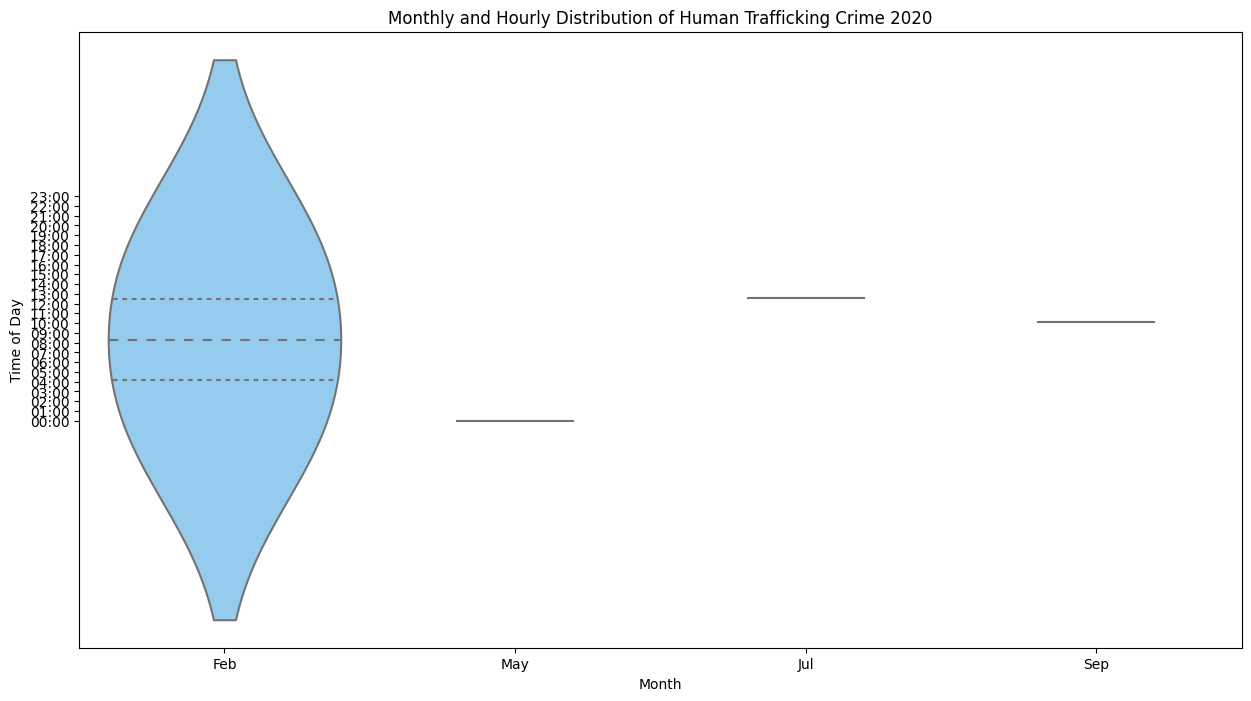

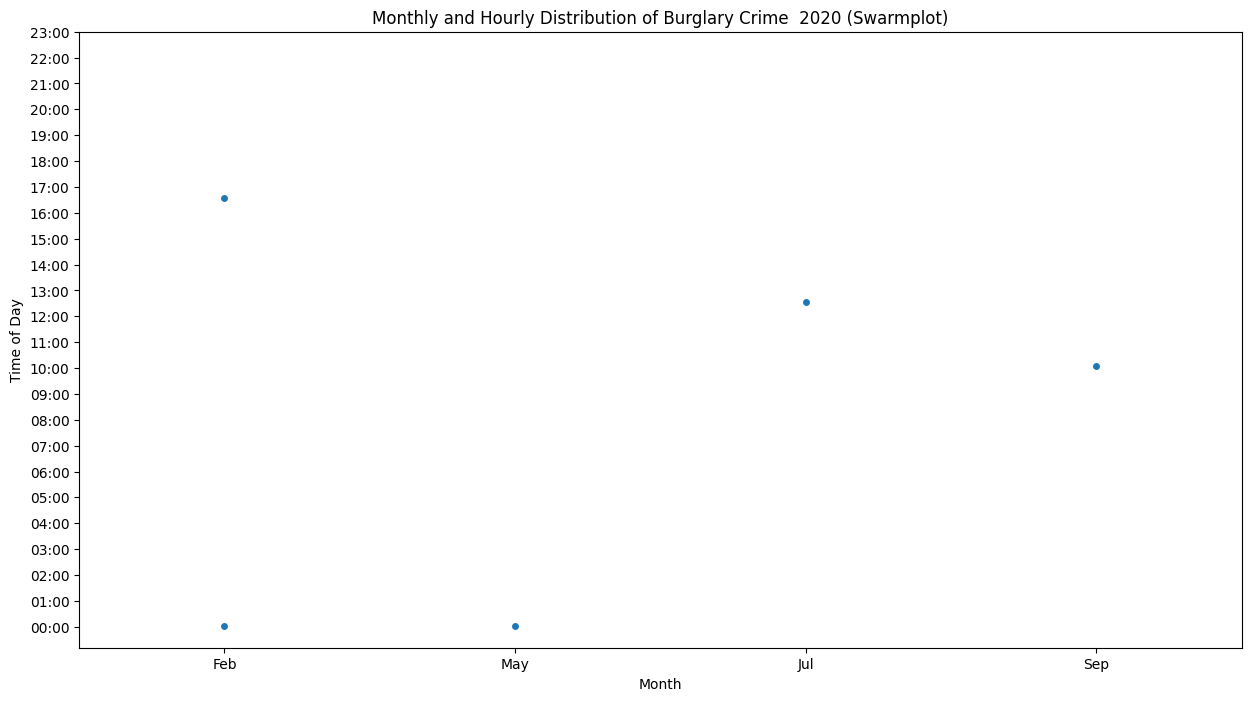

In [ ]:
# Filter data for the 'HOMICIDE' crime type
criminal_data = data[(data['Primary Type'] == 'HUMAN TRAFFICKING')]


# Convert the 'Date' column to a datetime object
criminal_data['Date'] = pd.to_datetime(criminal_data['Date'], format='%m/%d/%Y %I:%M:%S %p')

# Extract the month and time as minutes since midnight
criminal_data['Month'] = criminal_data['Date'].dt.strftime('%b')
criminal_data['Time'] = criminal_data['Date'].dt.hour * 60 + criminal_data['Date'].dt.minute

# Create the violin plot
plt.figure(figsize=(15, 8))
sns.violinplot(data=criminal_data, x='Month', y='Time', color="lightskyblue", inner='quart', scale='count')
plt.title('Monthly and Hourly Distribution of Human Trafficking Crime 2020')
plt.xlabel('Month')
plt.ylabel('Time of Day')
plt.yticks(range(0, 1440, 60), [f"{h:02d}:{m:02d}" for h in range(24) for m in range(0, 60, 60)])
plt.show()

# Create the swarmplot
plt.figure(figsize=(15, 8))
sns.swarmplot(data=criminal_data, x='Month', y='Time', size=5)
plt.title('Monthly and Hourly Distribution of Burglary Crime  2020 (Swarmplot)')
plt.xlabel('Month')
plt.ylabel('Time of Day')
plt.yticks(range(0, 1440, 60), [f"{h:02d}:{m:02d}" for h in range(24) for m in range(0, 60, 60)])
plt.show()

WEAPONS VIOLATION

<ipython-input-32-f2c7c4d26719>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  criminal_data['Date'] = pd.to_datetime(criminal_data['Date'], format='%m/%d/%Y %I:%M:%S %p')
<ipython-input-32-f2c7c4d26719>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  criminal_data['Month'] = criminal_data['Date'].dt.strftime('%b')
<ipython-input-32-f2c7c4d26719>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

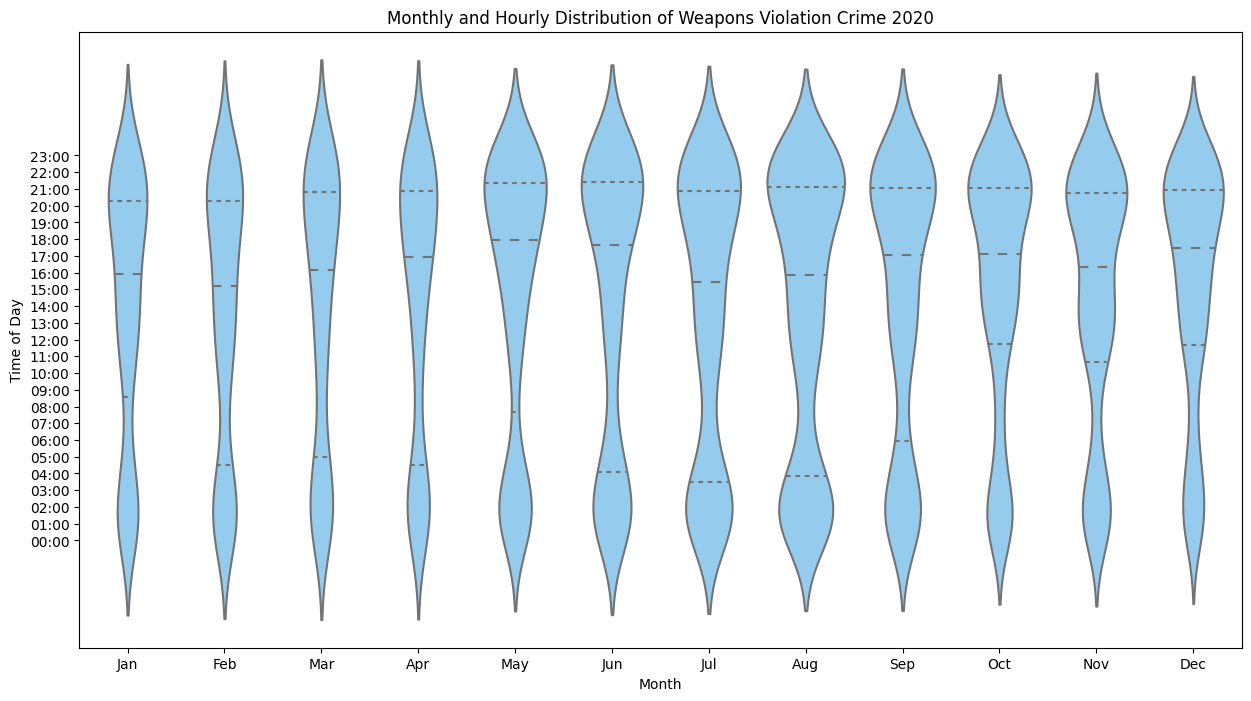

In [ ]:
# Filter data for the 'HOMICIDE' crime type
criminal_data = data[(data['Primary Type'] == 'WEAPONS VIOLATION')]


# Convert the 'Date' column to a datetime object
criminal_data['Date'] = pd.to_datetime(criminal_data['Date'], format='%m/%d/%Y %I:%M:%S %p')

# Extract the month and time as minutes since midnight
criminal_data['Month'] = criminal_data['Date'].dt.strftime('%b')
criminal_data['Time'] = criminal_data['Date'].dt.hour * 60 + criminal_data['Date'].dt.minute

# Create the violin plot
plt.figure(figsize=(15, 8))
sns.violinplot(data=criminal_data, x='Month', y='Time', color="lightskyblue", inner='quart', scale='count')
plt.title('Monthly and Hourly Distribution of Weapons Violation Crime 2020')
plt.xlabel('Month')
plt.ylabel('Time of Day')
plt.yticks(range(0, 1440, 60), [f"{h:02d}:{m:02d}" for h in range(24) for m in range(0, 60, 60)])
plt.show()

# Create the swarmplot
# plt.figure(figsize=(15, 8))
# sns.swarmplot(data=criminal_data, x='Month', y='Time', color="lightskyblue", size=5)
# plt.title('Monthly and Hourly Distribution of Weapons Violation Crime 2020 (Swarmplot)')
# plt.xlabel('Month')
# plt.ylabel('Time of Day')
# plt.yticks(range(0, 1440, 60), [f"{h:02d}:{m:02d}" for h in range(24) for m in range(0, 60, 60)])
# plt.show()

STALKING

<ipython-input-33-89e687dd075b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  criminal_data['Date'] = pd.to_datetime(criminal_data['Date'], format='%m/%d/%Y %I:%M:%S %p')
<ipython-input-33-89e687dd075b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  criminal_data['Month'] = criminal_data['Date'].dt.strftime('%b')
<ipython-input-33-89e687dd075b>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

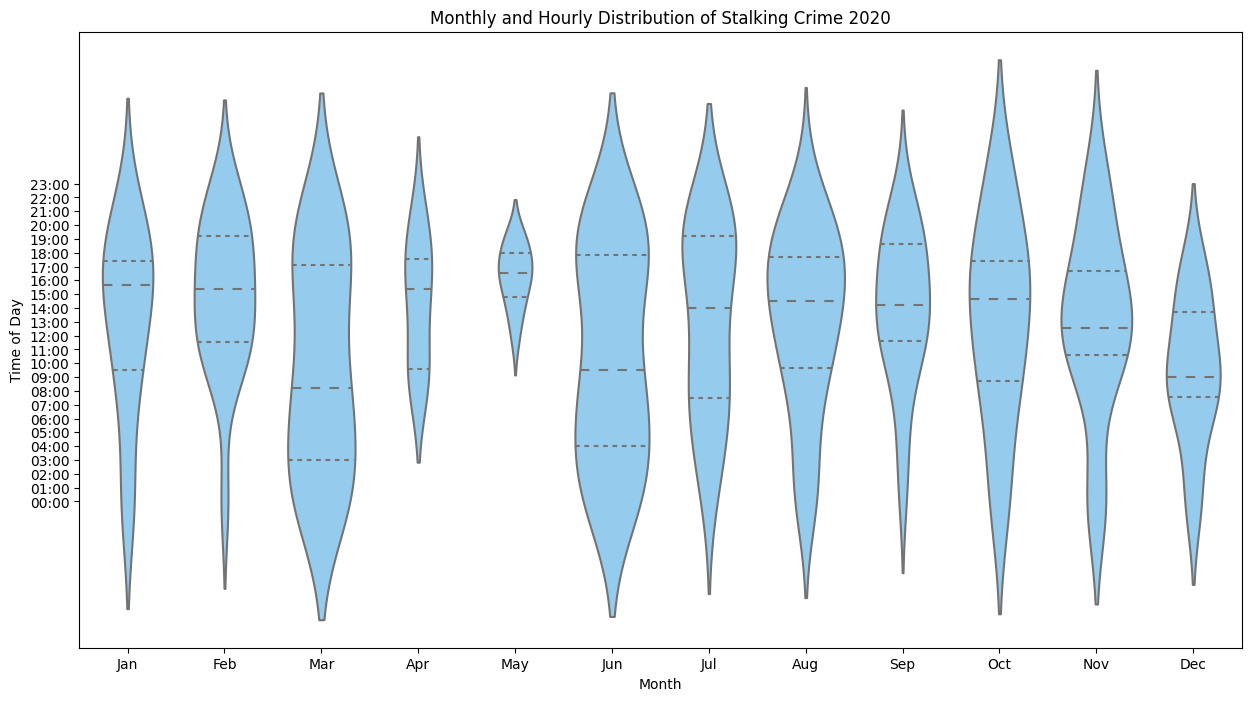

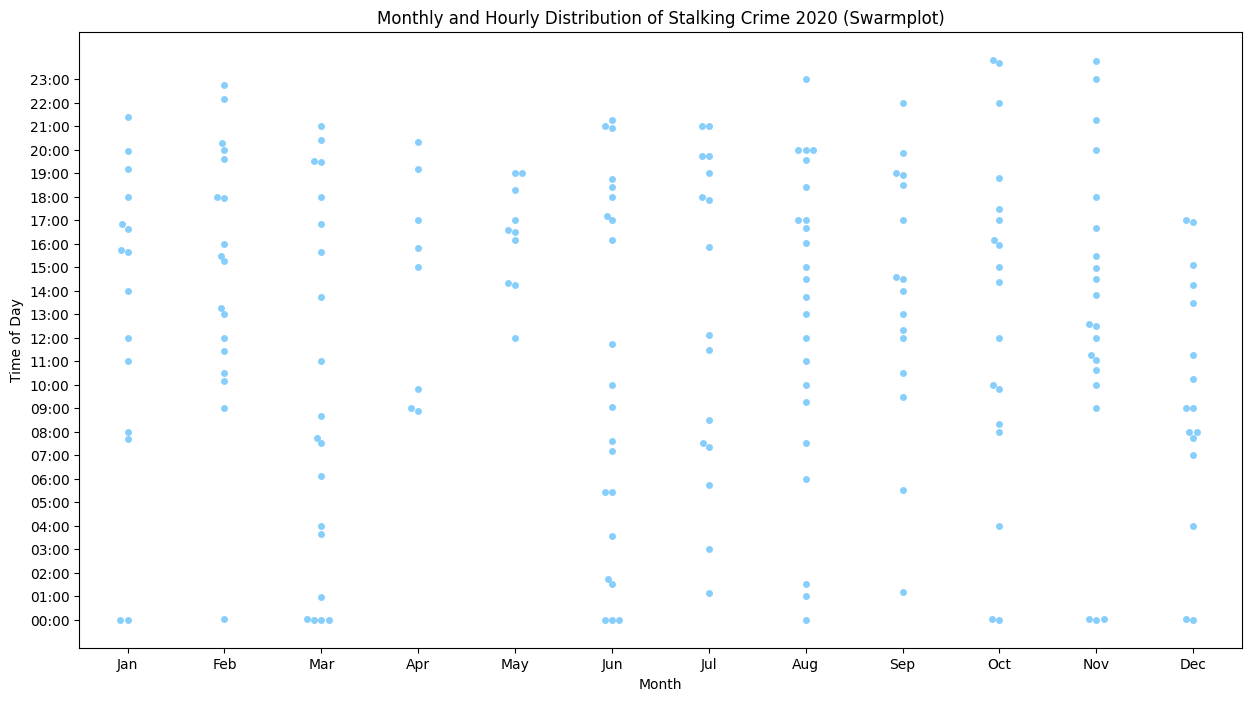

In [ ]:
# Filter data for the 'HOMICIDE' crime type
criminal_data = data[(data['Primary Type'] == 'STALKING')]


# Convert the 'Date' column to a datetime object
criminal_data['Date'] = pd.to_datetime(criminal_data['Date'], format='%m/%d/%Y %I:%M:%S %p')

# Extract the month and time as minutes since midnight
criminal_data['Month'] = criminal_data['Date'].dt.strftime('%b')
criminal_data['Time'] = criminal_data['Date'].dt.hour * 60 + criminal_data['Date'].dt.minute

# Create the violin plot
plt.figure(figsize=(15, 8))
sns.violinplot(data=criminal_data, x='Month', y='Time', color="lightskyblue", inner='quart', scale='count')
plt.title('Monthly and Hourly Distribution of Stalking Crime 2020')
plt.xlabel('Month')
plt.ylabel('Time of Day')
plt.yticks(range(0, 1440, 60), [f"{h:02d}:{m:02d}" for h in range(24) for m in range(0, 60, 60)])
plt.show()


# Create the swarmplot
plt.figure(figsize=(15, 8))
sns.swarmplot(data=criminal_data, x='Month', y='Time', color="lightskyblue", size=5)
plt.title('Monthly and Hourly Distribution of Stalking Crime 2020 (Swarmplot)')
plt.xlabel('Month')
plt.ylabel('Time of Day')
plt.yticks(range(0, 1440, 60), [f"{h:02d}:{m:02d}" for h in range(24) for m in range(0, 60, 60)])
plt.show()

# Crime hotspots in Chicago 2020-2022 - Vidyut

---

Hypothesis: There is a correlation between the concentration of reported crimes and the demographic composition of the Black population in the southwest region of Chicago.
Observations:
Spatial Overlap:

The visual analysis reveals a spatial overlap between the concentration of reported crimes and the distribution of the Black population, both prominently observed in the southwest region of Chicago.

Correlation Patterns:

This idea suggests that in the southwest area, where we see more reported crimes, there are also more Black people. If this turns out to be true, it could mean that there's a complicated mix of reasons, like money issues and how the community works, that play a role in both crime and where people live.

Potential Explanations:

Socio-Economic Factors:

Issues from the past that affect how much money people have, like not enough jobs or not enough resources, might be part of why we see more crime in the same area where there are more Black people.

Community Dynamics:

How the community behaves, the relationships between people, and the challenges they share could be part of why the Black population is concentrated in the same place as reported crimes.

Policy Implications:

If we can understand this connection better, it can help create policies that focus on preventing crime and addressing the specific needs of these communities. This way, we can take a more holistic approach to improving the well-being of the entire community.

Importance:

This idea is interesting because it looks into the possible link between where crimes happen and the Black population in one specific area. By studying these patterns, we can get a deeper understanding of what factors, like money problems or community dynamics, might be influencing crime rates. This knowledge can guide policymakers and community leaders in creating effective strategies to tackle the root causes of crime in the southwest region of Chicago.

Remember, it's crucial to remember that just because two things seem connected doesn't mean one causes the other. More research and thinking about other factors are needed for a full understanding of what's going on.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
!pip install pandas geopandas folium

In [ ]:
import folium

# Load crime data
crime_data = pd.read_csv(path + 'Crimes_-_Map.csv')

# Convert the 'DATE OF OCCURRENCE' column to datetime with the correct format
crime_data['DATE  OF OCCURRENCE'] = pd.to_datetime(crime_data['DATE  OF OCCURRENCE'], format='%m/%d/%Y %I:%M:%S %p')

# Filter data for the years 2020 to 2022
crime_data = crime_data[(crime_data['DATE  OF OCCURRENCE'].dt.year >= 2020) & (crime_data['DATE  OF OCCURRENCE'].dt.year <= 2022)]

# Create a map centered at the mean coordinates of the crime data
center_lat, center_lon = crime_data['LATITUDE'].mean(), crime_data['LONGITUDE'].mean()
crime_map = folium.Map(location=[center_lat, center_lon], zoom_start=12)

# Define grid cell size
grid_size = 0.01

# Create grid cells
crime_data['lat_bin'] = (crime_data['LATITUDE'] // grid_size) * grid_size
crime_data['lon_bin'] = (crime_data['LONGITUDE'] // grid_size) * grid_size

# Group by grid cells and count occurrences
crime_counts = crime_data.groupby(['lat_bin', 'lon_bin']).size().reset_index(name='CrimeCount')

# Add circles to represent crime density
for index, row in crime_counts.iterrows():
    folium.CircleMarker(
        location=[row['lat_bin'], row['lon_bin']],
        radius=row['CrimeCount'] / 12,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.6,
        popup=f"Crime Count: {row['CrimeCount']}",
    ).add_to(crime_map)

# Display the map
crime_map

<ipython-input-35-61024fbe2556>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_data['lat_bin'] = (crime_data['LATITUDE'] // grid_size) * grid_size
<ipython-input-35-61024fbe2556>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_data['lon_bin'] = (crime_data['LONGITUDE'] // grid_size) * grid_size


In [ ]:
import pandas as pd
import geopandas as gpd
import folium
!pip install plotly

# Population of Black People in Chicago


In [ ]:
# Load demographic data
demographic_data = pd.read_csv(path + 'Chicago_Population_Counts_20231107.csv')

# Filter demographic data for years up to 2022
demographic_data = demographic_data[demographic_data['Year'] <= 2022]

# Load GeoJSON file for Chicago ZIP code boundaries
geojson_path = path + 'Boundaries - ZIP Codes.geojson'
zip_boundaries = gpd.read_file(geojson_path)

# Merge demographic data with ZIP code boundary data
merged_data = pd.merge(zip_boundaries, demographic_data, left_on='zip', right_on='Geography')

# Create a folium map centered around Chicago
m = folium.Map(location=[41.8781, -87.6298], zoom_start=10)

# Add choropleth layer
folium.Choropleth(
    geo_data=merged_data,
    name='choropleth',
    data=merged_data,
    columns=['zip', 'Population - Black Non-Latinx'],
    key_on='feature.properties.zip',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Population - Black Non-Latinx',
).add_to(m)

# Display the map
m


Output hidden; open in https://colab.research.google.com to view.

# Population of LatinX People in Chicago

In [ ]:
# Load demographic data
demographic_data = pd.read_csv(path + 'Chicago_Population_Counts_20231107.csv')

# Filter demographic data for years up to 2022
demographic_data = demographic_data[demographic_data['Year'] <= 2022]

# Load GeoJSON file for Chicago ZIP code boundaries
geojson_path = path + 'Boundaries - ZIP Codes.geojson'
zip_boundaries = gpd.read_file(geojson_path)

# Merge demographic data with ZIP code boundary data
merged_data = pd.merge(zip_boundaries, demographic_data, left_on='zip', right_on='Geography')

# Create a folium map centered around Chicago
m = folium.Map(location=[41.8781, -87.6298], zoom_start=10)

# Add choropleth layer
folium.Choropleth(
    geo_data=merged_data,
    name='choropleth',
    data=merged_data,
    columns=['zip', 'Population - Latinx'],
    key_on='feature.properties.zip',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Population - Latinx',
).add_to(m)

# Display the map
m


Output hidden; open in https://colab.research.google.com to view.

# Population of Asian People in Chicago

In [ ]:
# Load demographic data
demographic_data = pd.read_csv(path + 'Chicago_Population_Counts_20231107.csv')

# Filter demographic data for years up to 2022
demographic_data = demographic_data[demographic_data['Year'] <= 2022]

# Load GeoJSON file for Chicago ZIP code boundaries
geojson_path = path + 'Boundaries - ZIP Codes.geojson'
zip_boundaries = gpd.read_file(geojson_path)

# Merge demographic data with ZIP code boundary data
merged_data = pd.merge(zip_boundaries, demographic_data, left_on='zip', right_on='Geography')

# Create a folium map centered around Chicago
m = folium.Map(location=[41.8781, -87.6298], zoom_start=10)

# Add choropleth layer
folium.Choropleth(
    geo_data=merged_data,
    name='choropleth',
    data=merged_data,
    columns=['zip', 'Population - Asian Non-Latinx'],
    key_on='feature.properties.zip',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Population - Asian Non-Latinx',
).add_to(m)

# Display the map
m


Output hidden; open in https://colab.research.google.com to view.

# Population of White People in Chicago

In [ ]:
# Load demographic data
demographic_data = pd.read_csv(path + 'Chicago_Population_Counts_20231107.csv')

# Filter demographic data for years up to 2022
demographic_data = demographic_data[demographic_data['Year'] <= 2022]

# Load GeoJSON file for Chicago ZIP code boundaries
geojson_path = path + 'Boundaries - ZIP Codes.geojson'
zip_boundaries = gpd.read_file(geojson_path)

# Merge demographic data with ZIP code boundary data
merged_data = pd.merge(zip_boundaries, demographic_data, left_on='zip', right_on='Geography')

# Create a folium map centered around Chicago
m = folium.Map(location=[41.8781, -87.6298], zoom_start=10)

# Add choropleth layer
folium.Choropleth(
    geo_data=merged_data,
    name='choropleth',
    data=merged_data,
    columns=['zip', 'Population - White Non-Latinx'],
    key_on='feature.properties.zip',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Population - White Non-Latinx',
).add_to(m)

# Display the map
m


Output hidden; open in https://colab.research.google.com to view.

# Population of Other Races in Chicago

In [ ]:
# Load demographic data
demographic_data = pd.read_csv(path + 'Chicago_Population_Counts_20231107.csv')

# Filter demographic data for years up to 2022
demographic_data = demographic_data[demographic_data['Year'] <= 2022]

# Load GeoJSON file for Chicago ZIP code boundaries
geojson_path = path + 'Boundaries - ZIP Codes.geojson'
zip_boundaries = gpd.read_file(geojson_path)

# Merge demographic data with ZIP code boundary data
merged_data = pd.merge(zip_boundaries, demographic_data, left_on='zip', right_on='Geography')

# Create a folium map centered around Chicago
m = folium.Map(location=[41.8781, -87.6298], zoom_start=10)

# Add choropleth layer
folium.Choropleth(
    geo_data=merged_data,
    name='choropleth',
    data=merged_data,
    columns=['zip', 'Population - White Non-Latinx'],
    key_on='feature.properties.zip',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Population - White Non-Latinx',
).add_to(m)

# Display the map
m

Output hidden; open in https://colab.research.google.com to view.

# **Hypothesis**: There is a positive correlation between the population of 0-17 years old and the crime rates in specific areas of Chicago - Vidyut

This hypothesis is interesting because it explores potential connections between the demographic structure of a neighborhood (specifically, the presence of a younger population) and the prevalence of reported crimes. Several criminological theories suggest that youth population density may influence crime rates due to factors such as peer influence, socio-economic conditions, and community resources. Investigating this hypothesis can contribute to a better understanding of the social dynamics influencing crime patterns in urban areas.

The visualizations reveal an intriguing spatial pattern in Chicago, particularly in the southwest region. The concentration of reported crimes appears to align with both a high density of the Black population and a significant population of individuals aged 0-17.

# **Observations**:
Spatial Concentration of Crime:

The heat map of crime rates highlights a concentrated area in the southwest, indicating that this region experiences a higher density of reported crimes compared to other parts of the city.

Coexistence with Black Population:

The southwest region, where crime is notably concentrated, corresponds with a significant concentration of the Black population. This observation suggests a potential correlation between the demographic composition of the area and crime rates.

Youth Population Density:

Furthermore, the southwest region also exhibits a higher density of individuals aged 0-17. The coexistence of a youthful population with elevated crime rates raises questions about the socio-economic factors, community resources, and potential influences contributing to this pattern.

In [ ]:
# Load demographic data
demographic_data = pd.read_csv(path + 'Chicago_Population_Counts_20231107.csv')

# Filter demographic data for years up to 2022
demographic_data = demographic_data[demographic_data['Year'] <= 2022]

# Load GeoJSON file for Chicago ZIP code boundaries
geojson_path = path + 'Boundaries - ZIP Codes.geojson'
zip_boundaries = gpd.read_file(geojson_path)

# Merge demographic data with ZIP code boundary data
merged_data = pd.merge(zip_boundaries, demographic_data, left_on='zip', right_on='Geography')

# Create a folium map centered around Chicago
m = folium.Map(location=[41.8781, -87.6298], zoom_start=10)

# Add choropleth layer
folium.Choropleth(
    geo_data=merged_data,
    name='choropleth',
    data=merged_data,
    columns=['zip', 'Population - Age 0-17'],
    key_on='feature.properties.zip',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Population - Age 0-17',
).add_to(m)

# Display the map
m

Output hidden; open in https://colab.research.google.com to view.

# EXPLORATION OF SOCIO-DEMOGRAPHIC AND EDUCATIONAL FACTORS  - Aashik



In [ ]:
#import neccessary libraries
import pandas as pd
#create dataframes and store the dataset
df1 = pd.read_csv(path + 'Census_Data_-_Selected_socioeconomic_indicators_in_Chicago__2008___2012.csv')
df2 = pd.read_csv(path + '2022.csv')

In [ ]:
#rename the column to match withthe both datasets
df2.rename(columns={'Community Area': 'Community Area Number'}, inplace=True)


In [ ]:
#merge both datasets
merged_df = pd.merge(df1, df2, on='Community Area Number', how='inner')


In [ ]:
#convert values to integer datatype
merged_df['Community Area Number'] = merged_df['Community Area Number'].astype(int)

In [ ]:
merged_df.tail()

,Community Area Number,COMMUNITY AREA NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,HARDSHIP INDEX,ID,...,District,Ward,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
239015,77,Edgewater,4.1,18.2,9.2,9.7,23.8,33385,19.0,13137008,...,24,48.0,11,NaN,NaN,2022,07/12/2023 03:42:37 PM,NaN,NaN,NaN
239016,77,Edgewater,4.1,18.2,9.2,9.7,23.8,33385,19.0,13156293,...,20,48.0,11,NaN,NaN,2022,07/29/2023 03:41:00 PM,NaN,NaN,NaN
239017,77,Edgewater,4.1,18.2,9.2,9.7,23.8,33385,19.0,13040103,...,20,48.0,11,NaN,NaN,2022,04/13/2023 03:41:28 PM,NaN,NaN,NaN
239018,77,Edgewater,4.1,18.2,9.2,9.7,23.8,33385,19.0,13129089,...,20,40.0,11,NaN,NaN,2022,07/05/2023 03:41:00 PM,NaN,NaN,NaN
239019,77,Edgewater,4.1,18.2,9.2,9.7,23.8,33385,19.0,13167342,...,20,48.0,06,NaN,NaN,2022,08/08/2023 03:41:53 PM,NaN,NaN,NaN


<ipython-input-60-0e3e894cebf2>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='COMMUNITY AREA NAME', y='HARDSHIP INDEX', data=merged_df, ci=None)


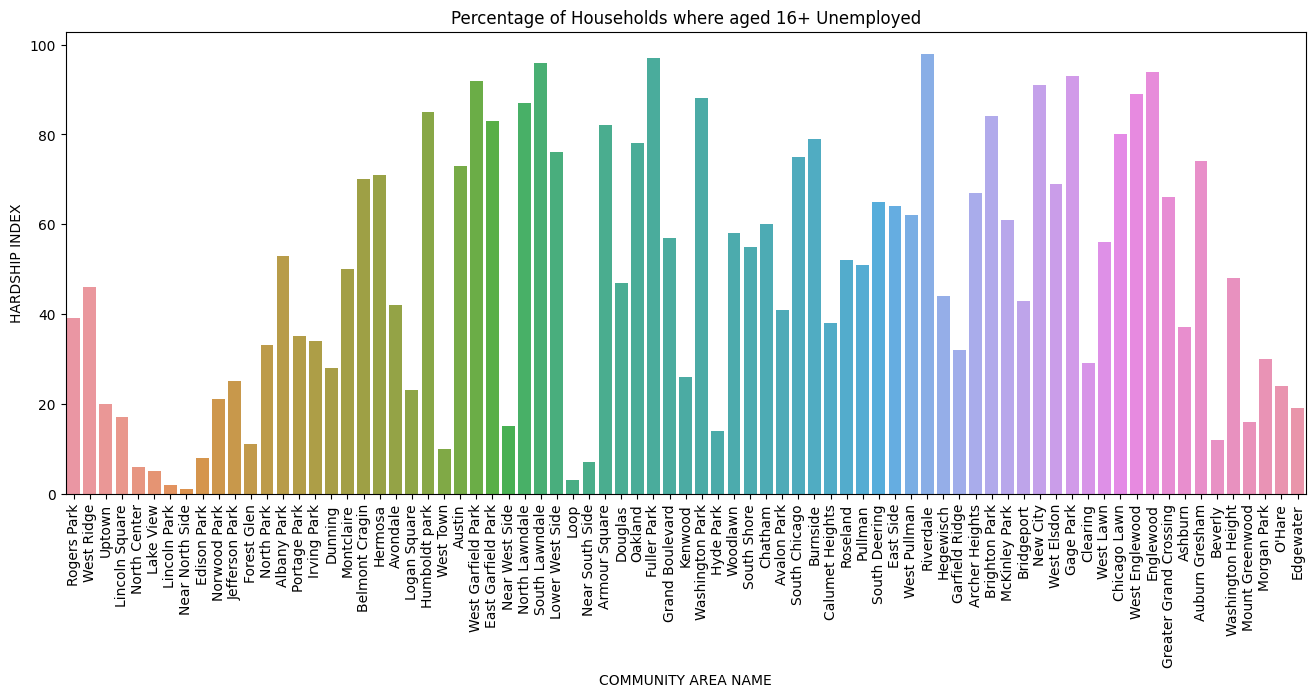

In [ ]:
# Importing necessary libraries for data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Creating a figure with a specific size for better readability
plt.figure(figsize=(16, 6))

# Generating a bar plot using Seaborn to visualize the relationship between 'COMMUNITY AREA NAME' and 'HARDSHIP INDEX'
# Data source: 'merged_df'
# 'ci=None' disables confidence intervals
sns.barplot(x='COMMUNITY AREA NAME', y='HARDSHIP INDEX', data=merged_df, ci=None)

# Rotating x-axis labels for improved visibility
plt.xticks(rotation=90)

# Setting the title of the plot
plt.title('Percentage of Households where aged 16+ Unemployed')

# Displaying the plot
plt.show()


In [ ]:
import plotly.express as px
import json

geojson_path = path + 'Boundaries - Community Areas (current).geojson'
with open(geojson_path, 'r') as f:
    geojson = json.load(f)
fig = px.choropleth_mapbox(merged_df,
                           geojson=geojson,
                           locations='Community Area Number',
                           color='PERCENT HOUSEHOLDS BELOW POVERTY',
                           color_continuous_scale="Viridis",  # Choose a color scale
                           featureidkey="properties.area_num_1",
                           hover_name='Community Area Number',
                           hover_data=['PERCENT HOUSEHOLDS BELOW POVERTY'],
                           mapbox_style="carto-positron",
                           center={"lat": 41.8781, "lon": -87.6298},  # Center the map on Chicago
                           zoom=8.5,
                           title='HOUSEHOLDS BELOW POVERTY (PERCENTAGE)'
                          )
fig.update_layout(margin={"r":0,"t":40,"l":0,"b":0})
fig.show()

Output hidden; open in https://colab.research.google.com to view.

# HYPOTHESIS:  Examining the Interplay of Socio-Demographic Factors and Educational Attainment on Crime Trends in Chicago

Our hypothesis delves into the intricate dynamics linking socio-demographic factors and educational attainment, postulating a synergistic relationship with crime trends in Chicago. We anticipate that regions exhibiting higher socio-demographic challenges and lower educational attainment will demonstrate an elevated incidence of criminal activities.

OBSERVATIONS:

Educational Attainment:
Our findings emphasize the pivotal role of educational attainment in influencing crime trends. Areas with a higher percentage of individuals aged 25 and above without a high school diploma exhibit an increased likelihood of criminal activities, highlighting the significance of educational disparities as a contributing factor to concentrated crime.

South-West Side Phenomenon:
The South-West side stands out as a focal point, marked not only by socio-demographic challenges but also a significant deficit in educational infrastructure. This convergence paints a vivid picture of a region grappling with the consequences of limited access to quality education and employment opportunities, fostering an environment conducive to heightened criminality.

Scientific Rigor and Methodology:
Our exploration relies on a robust methodological framework, utilizing advanced data visualization techniques and statistical analyses. Spatial visualizations, including choropleth maps, unveil crime rate spatial patterns, while regression analyses quantify relationships between crime rates and socio-demographic and educational variables.

Racial Dynamics:
Visualizations based on racial demographics reveal a nuanced interplay with crime rates, particularly in areas where the Black community constitutes a substantial portion of the population. This discovery prompts essential inquiries into the complex factors contributing to racial disparities in crime rates, necessitating a comprehensive exploration beyond socio-demographic and educational boundaries.

The bar plot depicting the hardship index across different Chicago community areas reveals a compelling variation in socio-economic challenges experienced by distinct regions with Riverdale having high Hardship Index.

Racial Patterns:
Insights derived from racial demographics reveal a nuanced interplay with crime rates, particularly in areas where the Black community constitutes a substantial portion of the population. This prompts essential inquiries into the complex factors contributing to racial disparities in crime rates, necessitating a comprehensive exploration beyond socio-demographic and educational boundaries.

# POPULATION OF UNEMPLOYED AGE GROUPS 16+

In [ ]:
# Importing necessary libraries for creating choropleth maps
import plotly.express as px
import json

# Path to the GeoJSON file containing community area boundaries
geojson_path = path + 'Boundaries - Community Areas (current).geojson'

# Reading the GeoJSON file and loading it into the 'geojson' variable
with open(geojson_path, 'r') as f:
    geojson = json.load(f)

# Creating a choropleth map using Plotly Express
fig = px.choropleth_mapbox(merged_df,
                           geojson=geojson,
                           locations='Community Area Number',
                           color='PERCENT AGED 16+ UNEMPLOYED',
                           color_continuous_scale="YlOrRd",  # Choose a color scale
                           featureidkey="properties.area_num_1",  # Key in GeoJSON identifying community areas
                           hover_name='COMMUNITY AREA NAME',  # Data to display when hovering over areas
                           hover_data=['COMMUNITY AREA NAME'],  # Additional data for hover information
                           mapbox_style="carto-positron",  # Map style
                           center={"lat": 41.8781, "lon": -87.6298},  # Center the map on Chicago
                           zoom=8.5,  # Initial zoom level
                           title='Percentage of Unemployed Age 16+'  # Plot title
                          )

# Updating layout to adjust margins for better presentation
fig.update_layout(margin={"r":0,"t":40,"l":0,"b":0})

# Displaying the choropleth map
fig.show()

Output hidden; open in https://colab.research.google.com to view.

# HYPOTHESIS: POSITIVE CORELATION OF INCREASING CRIME RATE WITH INCREASE OF UNEMPLOYMENT

Interestingly, we can see that the increase of crime rate with the increase of unemployment ratios from the above visualizations. This tells us that lack of employment plays a major role in creating crime over the City of Chicago. Based on race, we find that Blacks have the most involvement in crimes and South-West side of Chicago.

OBSERVATIONS:

Higher crime rates are evident in regions with a notable percentage of individuals aged 16+ lacking a high school diploma, emphasizing the impact of educational disparities.

The South-West side of Chicago is a central hub for socio-demographic challenges, characterized by deficiencies in educational infrastructure, limited access to quality education, and an associated increase in criminal activity.

A robust methodology, encompassing spatial visualizations and regression analyses, facilitates a thorough understanding of the intricate relationships among crime rates, socio-demographic factors, and education.

Analysis of racial demographics indicates elevated crime rates in areas with a substantial Black community, prompting a deeper exploration into the intricate factors contributing to racial disparities.

Examination of the hardship index through a bar plot across Chicago community areas pinpoints West Englewood and Riverdale as having the highest indices, signifying heightened socio-economic challenges.

The considerable variability in hardship indices underscores the diverse socio-economic challenges encountered across different regions in Chicago.

West Englewood and Riverdale emerge as distinctive areas confronting heightened levels of poverty, unemployment, and educational disparities, as mirrored in their elevated hardship indices.

# Data analysis of correlation between public event and crimes in chicago - (*by Prashant Gupta*)

>**Find number of crime reported on particular date and geographical area and then look if there has been an event nearby.**

### Data needed

1. Date, District, Lattitude, Longitude

## Hypothese: High increase in crimes during Black Lives Matter protest in chicago near downtown area.

Major dates in year 2020, for Black Lives Matter protest in chicago were May 30th, May 31st and August 9 and 10th. These protests were dominant in mainly chicago downtown area and its neighbourhood.

*Link of the source informations are following*

1. George Floyd protests in Chicago - Wikipedia : https://en.wikipedia.org/wiki/George_Floyd_protests_in_Chicago

2. How the weekend unfolded: Timeline of Chicago protests, looting and unrest : https://www.chicagotribune.com/news/breaking/ct-viz-george-floyd-protest-chicago-timeline-20200531-lfkd7p6ejbennfezhxk2u5kkmm-story.html


**Analysis and observation:** First 2 plots shows the unusual increase in crimes during BLM protest near downtown area. I have selected Police district corresponding to that area and shown the total crimes nearby dates to BLM protest dates. Last 3 plots show the reported crime locations on the BLM protest day.

**Conclusion**: High increase in reported crime on May 30th, May 31st and August 10th of year 2020 near downtown area is related to BLM protest event.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import folium

In [87]:
d20 = pd.read_csv(path + '2020.csv')

# parsing the date in datetime format
d20['Date'] = pd.to_datetime(d20['Date'], format="%m/%d/%Y %I:%M:%S %p")
d20.rename(columns={'Date':'date'},inplace=True)

# adding two new columns Date and Time
d20.insert(3,"Time",d20.date.dt.time)
d20.insert(3,"Date",d20.date.dt.date)

# Barplots

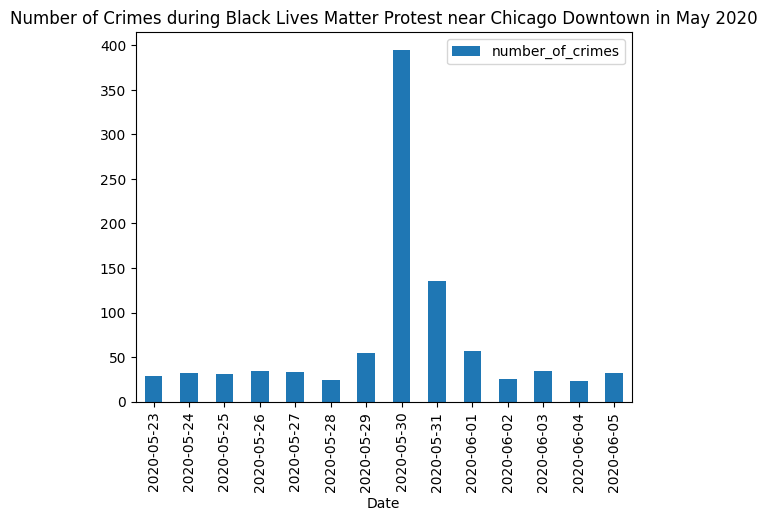

In [88]:
# filtering the data for downtown area around BLM protest day in may

df1 = d20[(d20["District"]==1) | (d20["District"]==18)][['Date','District']]
df1 = df1.loc[(df1['Date'].astype(str)>='2020-05-23') & (df1['Date'].astype(str)<='2020-06-05')]
df1 = df1.groupby('Date').count().reset_index()
df1.rename(columns={'District':'number_of_crimes'},inplace=True)

# barplot
df1.plot.bar(x='Date',y='number_of_crimes')
plt.title('Number of Crimes during Black Lives Matter Protest near Chicago Downtown in May 2020')
plt.show()

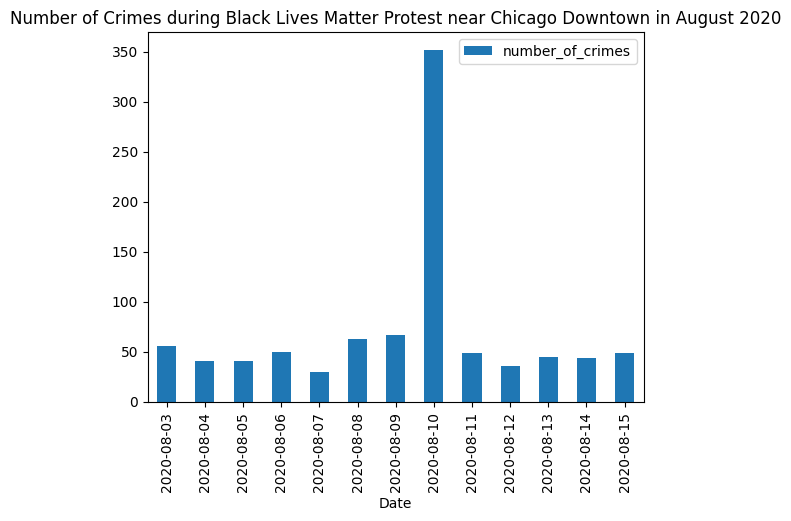

In [89]:
# filtering the data for downtown area around BLM protest day in August

df2 = d20[(d20["District"]==1) | (d20["District"]==18)][['Date','District']]
df2 = df2.loc[(df2['Date'].astype(str)>='2020-08-03') & (df2['Date'].astype(str)<='2020-08-15')]
df2 = df2.groupby('Date').count().reset_index()
df2.rename(columns={'District':'number_of_crimes'},inplace=True)

# barplot
df2.plot.bar(x='Date',y='number_of_crimes')
plt.title('Number of Crimes during Black Lives Matter Protest near Chicago Downtown in August 2020')
plt.show()

# Geospatial Plot

In [90]:
# filtering the crime data for downtown area on May 30th

df3 = d20[(d20["District"]==1) | (d20["District"]==18)]
df3 = df3.loc[df3["Date"].astype(str)=='2020-05-30'][['Latitude','Longitude']].dropna()
# df3


# geospatial_plot of crimes locations on May 30th

map = folium.Map(location=[df3.Latitude.mean(), df3.Longitude.mean()], zoom_start=13, control_scale=True)

for index, location_info in df3.iterrows():
    folium.Marker([location_info["Latitude"], location_info["Longitude"]]).add_to(map)

title_html = '''
             <h3 align="center" style="font-size:20px"><b> Crimes spots during BLM Protest on May 30th 2020 </b></h3>
             '''
map.get_root().html.add_child(folium.Element(title_html))

map

In [91]:
# filtering the crime data for downtown area on May 31st

df4 = d20[(d20["District"]==1) | (d20["District"]==18)]
df4 = df4.loc[df4["Date"].astype(str)=='2020-08-10'][['Latitude','Longitude']].dropna()
# df4


# geospatial_plot of crimes locations on May 31st

map = folium.Map(location=[df4.Latitude.mean(), df4.Longitude.mean()], zoom_start=13, control_scale=True)

for index, location_info in df4.iterrows():
    folium.Marker([location_info["Latitude"], location_info["Longitude"]]).add_to(map)

title_html = '''
             <h3 align="center" style="font-size:20px"><b> Crimes spots during BLM Protest on May 31st 2020 </b></h3>
             '''
map.get_root().html.add_child(folium.Element(title_html))

map

In [92]:
# filtering the crime data for downtown area on August 10th

df5 = d20[(d20["District"]==1) | (d20["District"]==18)]
df5 = df5.loc[df5["Date"].astype(str)=='2020-08-10'][['Latitude','Longitude']].dropna()
# df5


# geospatial_plot of crimes locations on August 10th

map = folium.Map(location=[df5.Latitude.mean(), df5.Longitude.mean()], zoom_start=13, control_scale=True)

for index, location_info in df5.iterrows():
    folium.Marker([location_info["Latitude"], location_info["Longitude"]]).add_to(map)

title_html = '''
             <h3 align="center" style="font-size:20px"><b> Crimes spots during BLM Protest on August 10th 2020 </b></h3>
             '''
map.get_root().html.add_child(folium.Element(title_html))

map

# ML Models

## Predict the crime category based on Location and Time - Pietro
In this section we are going to train a Decision Tree classifier to predict the category of a specific crime based on the Location and the Time when it occurred. This could be a valuable tool for understanding the needs of a victim calling 911 without being able to speak.

In [95]:
df = data_2022
# remove missing values
df = df.dropna()

# convert date from string to datetime
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.dayofweek
df['Hour'] = df['Date'].dt.hour

# scale latitude and longitude in [-1, 1]
scaler = StandardScaler()
df['Latitude'] = scaler.fit_transform(df['Latitude'].values.reshape(-1, 1))
df['Longitude'] = scaler.fit_transform(df['Longitude'].values.reshape(-1, 1))

<ipython-input-95-2b2f0a802b9d>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-95-2b2f0a802b9d>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-95-2b2f0a802b9d>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-95-2b2f0a8

First, we analyze the distributions of the available crime types

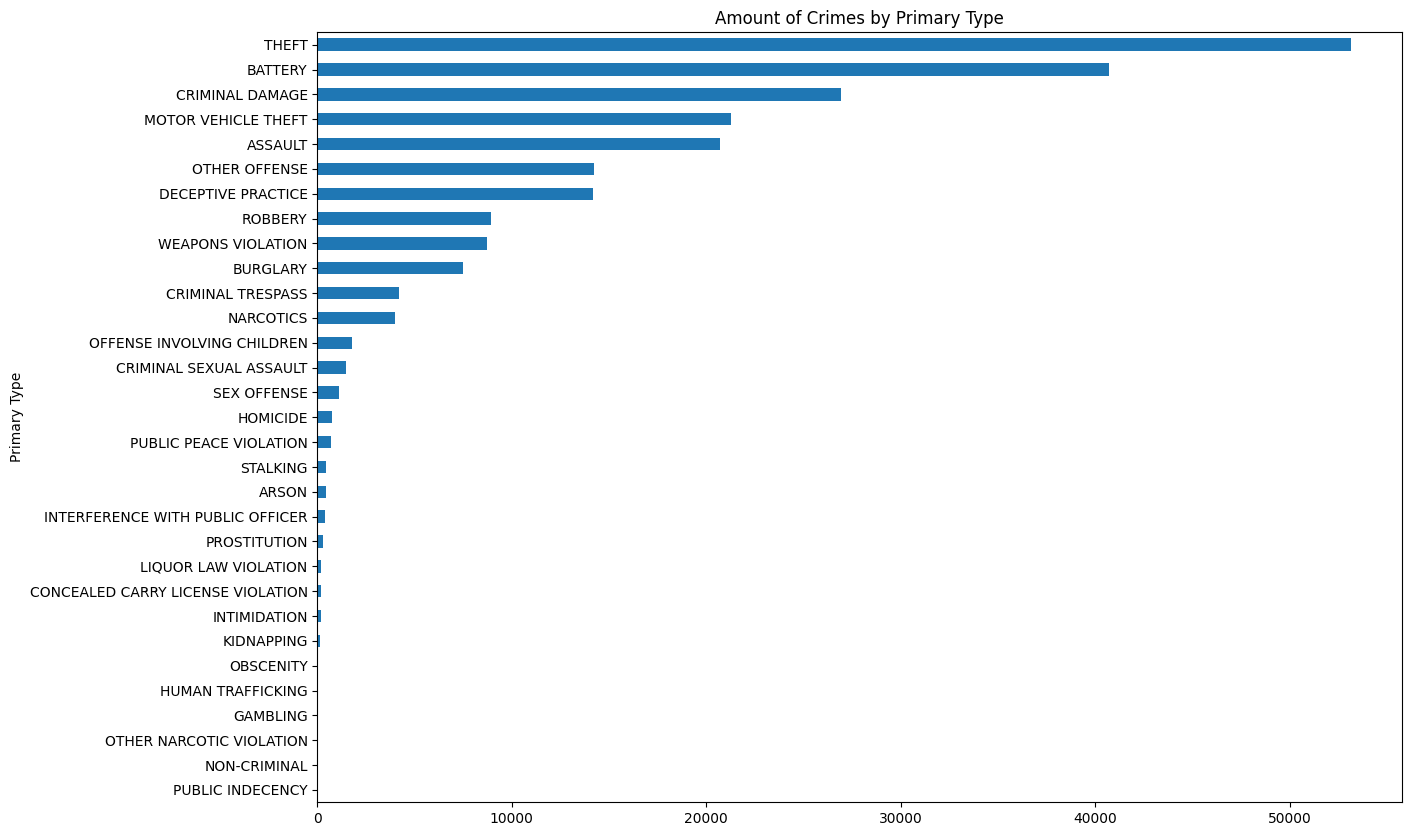

In [96]:
plt.figure(figsize=(14,10))
plt.title('Amount of Crimes by Primary Type')
plt.ylabel('Crime Type')
plt.xlabel('Amount of Crimes')

df.groupby([df['Primary Type']]).size().sort_values(ascending=True).plot(kind='barh')

plt.show()

In order to reducr the dataset, we random sample 50k examples

In [97]:
sampled_df = df.sample(n=50000, random_state=42)

We are going to group some of the Crime Types in macro classes ("Crime Category"):
1. Violent Crimes:
HOMICIDE
CRIM SEXUAL ASSAULT
ROBBERY
BATTERY
ASSAULT

2. Property Crimes:
THEFT
MOTOR VEHICLE THEFT
BURGLARY
CRIMINAL DAMAGE
CRIMINAL TRESPASS
DECEPTIVE PRACTICE

3. Drug-Related Crimes:
NARCOTICS

4. Public Order Crimes:
INTERFERENCE WITH PUBLIC OFFICER
PUBLIC PEACE VIOLATION
LIQUOR LAW VIOLATION
PROSTITUTION
GAMBLING
WEAPONS VIOLATION

5. Crimes Involving Children:
OFFENSE INVOLVING CHILDREN

6. Other Crimes:
ARSON
OTHER OFFENSE

the remeining crime types will be dropped because they are not frequent enough.

In [98]:
crime_type_groups = {
    'Violent Crimes': ['HOMICIDE', 'CRIM SEXUAL ASSAULT', 'ROBBERY', 'BATTERY', 'ASSAULT'],
    'Property Crimes': ['THEFT', 'MOTOR VEHICLE THEFT', 'BURGLARY', 'CRIMINAL DAMAGE', 'CRIMINAL TRESPASS', 'DECEPTIVE PRACTICE'],
    'Drug-Related Crimes': ['NARCOTICS'],
    'Public Order Crimes': ['INTERFERENCE WITH PUBLIC OFFICER', 'PUBLIC PEACE VIOLATION', 'LIQUOR LAW VIOLATION', 'PROSTITUTION', 'GAMBLING', 'WEAPONS VIOLATION'],
    'Crimes Involving Children': ['OFFENSE INVOLVING CHILDREN'],
    'Other Crimes': ['ARSON', 'OTHER OFFENSE']
}

def categorize_crime(primary_type):
    for category, crime_types in crime_type_groups.items():
        if primary_type in crime_types:
            return category
    return 'Other'

sampled_df['Crime Category'] = sampled_df['Primary Type'].apply(categorize_crime)

filtered_df = sampled_df[sampled_df['Crime Category'] != 'Other']
filtered_df['Crime Category'].value_counts()

Property Crimes              27307
Violent Crimes               15426
Other Crimes                  3109
Public Order Crimes           2189
Drug-Related Crimes            852
Crimes Involving Children      357
Name: Crime Category, dtype: int64

Now we create a Dummy Classifier to be used as baseline for our classifier.

In [99]:
filtered_df['Location Description'] = pd.factorize(filtered_df["Location Description"])[0]
filtered_df['District'] = pd.factorize(filtered_df["District"])[0]
filtered_df['Block'] = pd.factorize(filtered_df["Block"])[0]

X = filtered_df[['Latitude', 'Longitude', 'Month', 'Day', 'Hour', 'Location Description', 'Beat']].values
X = filtered_df[['Month', 'Hour', 'Location Description', 'Beat', 'Domestic', 'Block', 'District', 'Community Area']].values

y = filtered_df['Crime Category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dummy_classifier = DummyClassifier(strategy="most_frequent")

dummy_classifier.fit(X_train, y_train)

y_pred = dummy_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Dummy Classifier Accuracy: {accuracy:.2f}')

Dummy Classifier Accuracy: 0.56


<ipython-input-99-abf77274c56f>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-99-abf77274c56f>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-99-abf77274c56f>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Now, we train the decision tree. We select the hyperparameters by performing a grid search and train based on the optimal hyperparameters identified.


In [100]:
decision_tree = DecisionTreeClassifier(random_state=42)

param_grid = {
    'criterion': ['entropy'],
    'max_depth': [None],
    'min_samples_split': [300, 400, 500, 600],
    'min_samples_leaf': [2, 16, 30, 32, 34, 36, 40],
}

grid_search = GridSearchCV(decision_tree, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f'Best Hyperparameters: {best_params}')

best_decision_tree = DecisionTreeClassifier(random_state=42, **best_params)
best_decision_tree.fit(X_train, y_train)
y_pred = best_decision_tree.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Tuned Decision Tree Accuracy: {accuracy:.2f}')

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 36, 'min_samples_split': 300}
Tuned Decision Tree Accuracy: 0.67


## Arrest prediction
In this section we want to train a classifier for the 'Arrest' feature of the crime dataset.

As before, we first train a dummy classifier as baseline

In [101]:
X = sampled_df[['Primary Type', 'Beat', 'Hour', 'Location Description', 'Community Area', 'Latitude', 'Longitude', 'Domestic', 'Description']]
X['Primary Type'] = pd.factorize(X["Primary Type"])[0]
X['Location Description'] = pd.factorize(X["Location Description"])[0]
X['Description'] = pd.factorize(X["Description"])[0]

y = sampled_df['Arrest']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dummy_classifier = DummyClassifier(strategy="most_frequent")

dummy_classifier.fit(X_train, y_train)

y_pred = dummy_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Dummy Classifier Accuracy: {accuracy:.2f}')

Dummy Classifier Accuracy: 0.88


<ipython-input-101-ede6bf5fa1c6>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-101-ede6bf5fa1c6>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-101-ede6bf5fa1c6>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



We then train a neural network to classify the arrests.
The architecture we work with consists of 6 fully connected layers.

In [102]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(9, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(18, activation='relu'),
    tf.keras.layers.Dense(36, activation='relu'),
    tf.keras.layers.Dense(72, activation='relu'),
    tf.keras.layers.Dense(36, activation='relu'),
    tf.keras.layers.Dense(18, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=1000, validation_data=(X_test, y_test))

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

Epoch 1/10
40/40 [==============================] - 2s 14ms/step - loss: 0.4482 - accuracy: 0.8760 - val_loss: 0.3541 - val_accuracy: 0.8839
Epoch 2/10
40/40 [==============================] - 0s 8ms/step - loss: 0.3359 - accuracy: 0.8858 - val_loss: 0.3377 - val_accuracy: 0.8839
Epoch 3/10
40/40 [==============================] - 0s 7ms/step - loss: 0.3249 - accuracy: 0.8858 - val_loss: 0.3314 - val_accuracy: 0.8839
Epoch 4/10
40/40 [==============================] - 0s 7ms/step - loss: 0.3173 - accuracy: 0.8858 - val_loss: 0.3265 - val_accuracy: 0.8839
Epoch 5/10
40/40 [==============================] - 0s 7ms/step - loss: 0.3094 - accuracy: 0.8858 - val_loss: 0.3188 - val_accuracy: 0.8839
Epoch 6/10
40/40 [==============================] - 0s 8ms/step - loss: 0.3027 - accuracy: 0.8858 - val_loss: 0.3145 - val_accuracy: 0.8840
Epoch 7/10
40/40 [==============================] - 0s 8ms/step - loss: 0.2986 - accuracy: 0.8852 - val_loss: 0.3116 - val_accuracy: 0.8847
Epoch 8/10
40/40 [=

# ○ What is the most challenging part of the project that you’ve encountered so far?

For some of the crime types there were very sparse data so it was hard to analyze the temporal pattern for that specific crime. For example, kidnapping is an alarming crime type in Chicago as per the police report but we do not have good data to analyze the pattern. Integrating the demographic data with the ZIP code boundaries for Chicago had a lot of challenges as well. Ensuring that the GeoJSON file's column names matched the expected format in the code required careful attention. Finding events data for Chicago of the year 2020 is difficult as there is no organized data for it. Therefore, we have to rely on basic google search to find an event which had occurred and have potential relation to the increase in the reported crimes.

# ○ What are your initial insights?

We thought reducing daytime will increase the crime rate but we found the crime is high during summer. We also discovered that there is a spatial overlap between the concentration of reported crimes and the distribution of the Black population, both prominently observed in the southwest region of Chicago.

# ○ Are there any concrete results you can show at this point? If not, why not?

We thought reducing daytime will increase the crime rate but we found the crime is high during summer. Moreover, We found that in the southwest region of Chicago, there's a connection between where crimes happen and where more Black people live. Also, there seems to be a link between areas with higher crime rates and a larger population of young people (0-17 years old). Black Lives Matter Protest near Chicago downtown has correlation with increase in reported crimes during major days of protest which were May 30th, 31st and August 10th.

# ○ Going forward, what are the current biggest problems you’re facing?

The main challenges going forward involve conducting deeper statistical analyses to establish robust correlations and exploring additional factors that might influence crime rates. Validating the observed patterns and understanding the causality behind these correlations are crucial steps. We should spend more time looking closely at the numbers, exploring other factors that might affect crime, and making our visualizations even clearer.

# ○ Do you think you are on track with your project? If not, what parts do you need to dedicate more time to?

Yes, the project is on track. The initial visualizations have provided valuable insights, but more in-depth analysis and exploration of potential influencing factors are necessary for a comprehensive understanding.

# ○ Given your initial exploration of the data, is it worth proceeding with your project, why? If not, how will you move forward (method, data etc)?

Next, we'll dive into more detailed analysis, check if other factors play a role, and make sure our data is solid. It's like solving a puzzle – we've got some pieces, but there's more to uncover to see the whole picture. Moving forward we may deep dive into analyzing correlations with other external factors.


Future Plans:

Review and refine the initial findings based on feedback and additional insights gained during the initial analysis.

Explore the possibility of incorporating additional relevant datasets to enhance the depth and breadth of the analysis.

Evaluate different ML models suitable for your analysis, such as regression models, random forests etc. Choose models based on their appropriateness for the data and the problem at hand.

Conduct iterative analyses to explore different perspectives and ensure robustness in the identified correlations.

Establish clear documentation standards for recording the analysis process, methodologies, and key decisions made during the project. And prepare a presentation that highlights the main findings, methodology, and implications of the analysis
